# **Wine Quality Prediction**

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1Xe2EllPADqOiYjWGgpCvJhcSu7mKzYgw">
</p>

## **1. Introduction**

Wine is an alcoholic beverage made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol, carbon dioxide, and heat. It is a pleasant-tasting alcoholic beverage, loved celebrated. It will be interesting to analyze the physicochemical attributes of wine and understand their relationships and significance with wine quality. To do this, we will proceed according to the standard Machine Learning and data mining workflow models.

The goal of this project is to predict the quality of wine samples, which can be bad or good.

The dataset is related to red and white variants of the "Vinho Verde" wine. Vinho Verde is a unique product from the Minho (northwest) region of Portugal. Medium in alcohol, it is particularly appreciated due to its freshness (especially in the summer). Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

### **1.1 Data description**

Two datasets are included, related to red and white Vinho Verde wine samples.

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). 

Input variables (based on physicochemical tests):
1.  *fixed acidity*: most acids involved with wine or fixed or nonvolatile (do not evaporate readily).
2.  *volatile acidity*: the amount of acetic acid in wine, which at too high levels can lead to an unpleasant taste.
3.  *citric acid*: found in small quantities, citric acid can add 'freshness' and flavour to wines.
4.  *residual sugar*: the amount of sugar remaining after fermentation stops. It's rare to find wines with less than 1 gram/litre; wines with greater than 45 grams/litre are considered sweet.
5.  *chlorides*: the amount of salt in the wine.
6.  *free sulfur dioxide*: the free form of $SO_2$ exists in equilibrium between molecular $SO_2$ (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of the wine.
7.  *total sulfur dioxide*: the amount of free and bound forms of $SO_2$; in low concentrations, it is mostly undetectable in wine, but at free $SO_2$ concentrations over 50 ppm, it becomes evident in the nose and taste of wine.
8.  *density*: the density of the wine is close to that of water depending on the per cent alcohol and sugar content.
9.  *pH*: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale.
10. *sulphates*: a wine additive which can contribute to sulfur dioxide gas ($SO_2$) levels, which acts as an antimicrobial and antioxidant.
11. *alcohol*: the per cent alcohol content of the wine.

Output variable (based on sensory data):
12. *quality* (score between 0 and 10)

**Note**:
*  We are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### **1.2 Preliminary Operations**

First of all, let's start by creating two new features:
* **"type"**: after merging the two datasets we must be able to distinguish red wines from to white ones and for this reason we create this new variable: 
<br><br>
<center>
    $type = \begin{cases} 0, & \mbox{if } red\;wine \\ 1, & \mbox{if } white\;wine \end{cases}$
</center>
<br>
* **"quality_label"**: Since quality is based on sensory data, in a certain manner, is a subjective evaluation. It is not so important to build a classifier that can predict exactly the wine quality, therefore, in my opinion, is more convenient to have a classifier that can recognize if a wine has a bad or good taste. Based on this idea, I added this new feature and for all the classification steps I consider this as the output variable. I consider a sample with quality greater than 6 as good and as bad all the others. For concerning the regression, there are no changes because I will try to predict the exact quality.
<br><br>
<center>
    $quality\;class = \begin{cases} 0\;(Bad), & \mbox{if } quality \leq 6 \\ 1\;(Good), & \mbox{if } quality > 6 \end{cases}$
</center>

## **2. Exploratory Data Analysis (EDA)**

In [2]:
%matplotlib inline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 
from IPython.core.display import HTML
from imblearn.pipeline import Pipeline

# Librerie standard
import pandas as pd
import csv
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
import numpy as np
# Scipy
from scipy.stats.stats import pearsonr
from scipy.stats import shapiro, kurtosis, skew, norm, probplot, boxcox, f_oneway, normaltest

#Statsmodel
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import precision_recall_curve, make_scorer, auc, roc_curve, r2_score, confusion_matrix, precision_score, f1_score, recall_score, classification_report, accuracy_score, mean_absolute_error, mean_squared_error

#Grafici
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.figure_factory as ff
import plotly.express as px
import plotly.offline as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# Altro
import warnings
from patsy import dmatrices
# Stampare decision tree
from sklearn.tree import export_graphviz
from io import StringIO   
from IPython.display import Image  
import pydotplus
import matplotlib

#--- Importo i file ---#
wine_red   = pd.read_csv("winequality-red.csv", sep=";")
wine_white = pd.read_csv("winequality-white.csv", sep=";")
wine_red.columns = wine_red.columns.str.replace(" ", "_")
wine_white.columns = wine_white.columns.str.replace(" ", "_")

# definisco alpha che mi serve per i test
alpha = 0.05
warnings.filterwarnings('ignore')
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

wine_red['type'] = 0
wine_red['type'].astype('int32')
wine_white['type'] = 1 
wine_white['type'].astype('int32')
wines = pd.concat([wine_white, wine_red])

seed = 101
wines = wines.sample(frac=1, random_state=seed).reset_index(drop=True)

def is_normal(x, treshhold = 0.05):
    k2, p = normaltest(x)
    if p > treshhold:
        msg = "Acept $H_0$, normal"
    else:
        msg = "Reject $H_0$, not normal"
    return p, msg
    
def score_to_label(x):
    if x > 6:
        return 1 #good
    else:
        return 0 #bad
    
def display_table(data):
    html = "<table border=\"1\" class=\"dataframe\">"
    for index, row in enumerate(data):
        if index == 0:
            html += "<thead><tr style=\"text-align:right;\">"
        else:
            html += "<tr>"
                    
        for field in row:
            if index == 0:
                html += "<th>%s<th>"%(field)
            else:
                html += "<td>%s<td>"%(field)
        html += "</tr>"
        if index == 0:
            html += "</thead><tbody>"
    html += "</tbody></table>"
    display(HTML(html))

def rstr(df, pred=None): 
    obs = df.shape[0]
    types = df.dtypes
    counts = df.apply(lambda x: x.count())
    nulls = df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(lambda x: x.unique().shape[0])
    skewness = df.skew()
    kurtosis = df.kurt() 
    
    if pred is None:
        cols = ['types', 'counts', 'distincts', 'nulls', 'skewness', 'kurtosis']
        str = pd.concat([types, counts, distincts, nulls, skewness, kurtosis], axis = 1)

    else:
        corr = df.corr()[pred]
        str = pd.concat([types, counts, distincts, nulls, skewness, kurtosis, corr], axis = 1, sort=False)
        corr_col = 'correlation with '  + pred
        cols = ['types', 'counts', 'distincts', 'nulls', 'skewness', 'kurtosis', corr_col ]
    
    str.columns = cols
    dtypes = str.types.value_counts()
    return str
wines['quality_label'] = wines.quality.apply(score_to_label)

display(HTML("""<style>/* cyrillic-ext */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: local('Roboto'), local('Roboto-Regular'), url(https://fonts.gstatic.com/s/roboto/v20/KFOmCnqEu92Fr1Mu72xKOzY.woff2) format('woff2');
  unicode-range: U+0460-052F, U+1C80-1C88, U+20B4, U+2DE0-2DFF, U+A640-A69F, U+FE2E-FE2F;
}
/* cyrillic */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: local('Roboto'), local('Roboto-Regular'), url(https://fonts.gstatic.com/s/roboto/v20/KFOmCnqEu92Fr1Mu5mxKOzY.woff2) format('woff2');
  unicode-range: U+0400-045F, U+0490-0491, U+04B0-04B1, U+2116;
}
/* greek-ext */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: local('Roboto'), local('Roboto-Regular'), url(https://fonts.gstatic.com/s/roboto/v20/KFOmCnqEu92Fr1Mu7mxKOzY.woff2) format('woff2');
  unicode-range: U+1F00-1FFF;
}
/* greek */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: local('Roboto'), local('Roboto-Regular'), url(https://fonts.gstatic.com/s/roboto/v20/KFOmCnqEu92Fr1Mu4WxKOzY.woff2) format('woff2');
  unicode-range: U+0370-03FF;
}
/* vietnamese */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: local('Roboto'), local('Roboto-Regular'), url(https://fonts.gstatic.com/s/roboto/v20/KFOmCnqEu92Fr1Mu7WxKOzY.woff2) format('woff2');
  unicode-range: U+0102-0103, U+0110-0111, U+0128-0129, U+0168-0169, U+01A0-01A1, U+01AF-01B0, U+1EA0-1EF9, U+20AB;
}
/* latin-ext */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: local('Roboto'), local('Roboto-Regular'), url(https://fonts.gstatic.com/s/roboto/v20/KFOmCnqEu92Fr1Mu7GxKOzY.woff2) format('woff2');
  unicode-range: U+0100-024F, U+0259, U+1E00-1EFF, U+2020, U+20A0-20AB, U+20AD-20CF, U+2113, U+2C60-2C7F, U+A720-A7FF;
}
/* latin */
@font-face {
  font-family: 'Roboto';
  font-style: normal;
  font-weight: 400;
  src: local('Roboto'), local('Roboto-Regular'), url(https://fonts.gstatic.com/s/roboto/v20/KFOmCnqEu92Fr1Mu4mxK.woff2) format('woff2');
  unicode-range: U+0000-00FF, U+0131, U+0152-0153, U+02BB-02BC, U+02C6, U+02DA, U+02DC, U+2000-206F, U+2074, U+20AC, U+2122, U+2191, U+2193, U+2212, U+2215, U+FEFF, U+FFFD;
}

.text_cell {
    font-family: 'Roboto' !important;
    font-weight: 400 !important;
    font-size: 15px;
    color: #212121;
    text-align: justify;
    justify-content: space-evenly;
    text-justify: inter-word;
}
.output {
    align-items: center;
}
.text_cell_render p {
    text-align: justify !important;
    text-justify: inter-word !important;
}
div.output_area {
    padding-left: 0.4em;
}
</style>"""))

### **2.1 Take a First Look of our Data**

Before exploring the data we need to define some terms:
<ul>
	<li><b>Kurtosis</b>: is an important descriptive statistic of data distribution and it determines the heaviness of the distribution tails.</li><br>
<center><img width=600 src="https://drive.google.com/uc?export=view&id=1PSLO5sy0Z9xNyCDeDpCHFV9pcrU6n2ug"></center><br>
   <ul>
       <li><i>Negative</i>: negative values of kurtosis indicate that distribution is flat and has thin tails. Platykurtic distributions have negative kurtosis values. A platykurtic distribution is less peaked when compared with the normal distribution.</li>
     <li><i>Positive</i>: positive values of kurtosis indicate that distribution is peaked and possess thick tails. Leptokurtic distributions have positive kurtosis values.
       A leptokurtic distribution has a higher peak than a normal distribution.</li>
   </ul>
   <br>
  <li><b>Skewness</b>: is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive, zero, negative. Negative skew commonly indicates that the tail is on the left side of the distribution, and positive skew indicates that the tail is on the right.</li><br>
    <center><img width=600 src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/892px-Negative_and_positive_skew_diagrams_%28English%29.svg.png"></center><br><ul>
<ul><li><i>Negative</i>: The left tail is longer; the mass of the distribution is concentrated on the right of the figure. The distribution is said to be left-skewed or left-tailed even though the curve itself appears to be skewed to the right.</li>
<li><i>Positive</i>: The right tail is longer; the mass of the distribution is concentrated on the left of the figure. The distribution is said to be right-skewed or right-tailed even though the curve itself appears to be skewed to the left.</li></ul></ul>
    
    
After preliminary definitions, we can start looking at the dataset and its features. First of all, we print a table with some interesting values for each feature such as the number of missing values, skewness, kurtosis, counts, type and correlation with quality.
At first sight, we can notice that we have 6497 samples with no missing values. In the machine learning field, the more samples we have and the more we can build a model capable of classifying well.  


In [6]:
details = rstr(wines, 'quality')
details

types  counts  distincts  nulls  skewness   kurtosis  \
fixed_acidity         float64    6497        106      0  1.723290   5.061161   
volatile_acidity      float64    6497        187      0  1.495097   2.825372   
citric_acid           float64    6497         89      0  0.471731   2.397239   
residual_sugar        float64    6497        316      0  1.435404   4.359272   
chlorides             float64    6497        214      0  5.399828  50.898051   
free_sulfur_dioxide   float64    6497        135      0  1.220066   7.906238   
total_sulfur_dioxide  float64    6497        276      0 -0.001177  -0.371664   
density               float64    6497        998      0  0.503602   6.606067   
pH                    float64    6497        108      0  0.386839   0.367657   
sulphates             float64    6497        111      0  1.797270   8.653699   
alcohol               float64    6497        111      0  0.565718  -0.531687   
quality                 int64    6497          7      0  0.189623   0.232322   
type                    int64    6497          2      0 -1.179095  -0.609922   
quality_label           int64    6497          2      0  1.527553   0.333522   

                      correlation with quality  
fixed_acidity                        -0.076743  
volatile_acidity                     -0.265699  
citric_acid                           0.085532  
residual_sugar                       -0.036980  
chlorides                            -0.200666  
free_sulfur_dioxide                   0.055463  
total_sulfur_dioxide                 -0.041385  
density                              -0.305858  
pH                                    0.019506  
sulphates                             0.038485  
alcohol                               0.444319  
quality                               1.000000  
type                                  0.119323  
quality_label                         0.759360

In this table above, we can notice that there are no missing values and some features are very far from being normally distributed (e.g., chlorides has high skewness and kurtosis).
Having features normally distributed is always our goal but sometimes, for many reasons, our distributions do not have this shape (like in this case).

Later in this project, we will see a set of transformations that could be useful to minimize this problem.

### **2.2 Duplicates**

In [7]:
html_code = """<i>Number of duplicated rows: %d</i>""" % int(wines.duplicated().sum())
display(HTML(html_code))

**Why are there duplicates?**: Sometimes there may be identical samples. In this situation, we have to remember that each sample (row) corresponds to a review by a wine expert therefore duplicates represent the same review made by different wine experts.

**Should we remove them or not?** Often is a good practice to remove duplicates from the dataset because they can add a bias to our model toward the majority class.
In particular situations like this, I think that the duplicated rows look more like several wine tasters rating the same wine similarly. Hence, it will be relevant to keep all the observations as this can add more information. Doing several tests, I noticed that with duplicates I get 6% more on each score (accuracy, precision, recall, f1) so I will not delete them.

In [8]:
#1o grafico
rw_q = wines.quality[wines.type == 0].value_counts(sort=False).sort_index()
rw_q = (list(rw_q.index), list(rw_q.values))
# 2o grafico
ww_q = wines.quality[wines.type == 1].value_counts(sort=False).sort_index()
ww_q = (list(ww_q.index), list(ww_q.values))
# 3o grafico
rw_q_2 = wines.quality_label[wines.type == 0].value_counts()
formatted = ['Bad' if i == 0 else 'Good' for i in rw_q_2.index]
rw_q_2 = (formatted, list(rw_q_2.values))
#4o grafico
ww_q_2 = wines.quality_label[wines.type == 1].value_counts()
ww_q_2 = (['Bad' if i == 0 else 'Good' for i in ww_q_2.index], list(ww_q_2.values))

fig = make_subplots(rows=2, cols=2, subplot_titles=("Red Wine", "White Wine", "Red Wine", "White Wine"))
fig.add_trace(go.Bar(x=rw_q[0], y=rw_q[1], text=rw_q[1], marker_color="#c71f37", textposition='auto'), row=1, col=1)
fig.add_trace(go.Bar(x=ww_q[0], y=ww_q[1], text=ww_q[1], marker_color="#ffe066", textposition='auto'), row=1, col=2)
fig.add_trace(go.Bar(x=rw_q_2[0], y=rw_q_2[1], text=rw_q_2[1], marker_color="#c71f37", textposition='auto'), row=2, col=1)
fig.add_trace(go.Bar(x=ww_q_2[0], y=ww_q_2[1], text=ww_q_2[1], marker_color="#ffe066", textposition='auto'), row=2, col=2)

fig.update_layout(paper_bgcolor='rgba(0,0,0,0)', width=900,xaxis_type='category', xaxis2_type='category', xaxis3_type='category', xaxis4_type='category', 
                  showlegend=False, title_text = "Wine Type vs. Quality")

fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))

# Update xaxis properties
fig.update_xaxes(title_text="Quality", row=1, col=1)
fig.update_xaxes(title_text="Quality", row=1, col=2)
fig.update_xaxes(title_text="Quality Class", row=2, col=1)
fig.update_xaxes(title_text="Quality Class", row=2, col=2)

# Update yaxis properties
fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2) 
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

fig.show(renderer = 'notebook_connected')

From this graph, we have a graphical demonstration of the different size of the classes because there are more "bad wines" than "good" ones. Being in this situation leads the model to be less able to detect and predict the minority class (the good wines in this case). Several algorithms can allow us to re-balance the data with different techniques as we will see later (undersampling/oversampling). 

We are in a situation similar to that seen in the *Credit card fraud detection* where almost all the samples were negative and only a few were positive. In that situation, there was an even greater imbalance between the classes.
Fortunately, our case is not so "imbalanced" but we can make the same (or similar) choices.

This will be detailed in the section on analysis methodology.

### **2.3 Descriptive Statistics ...**

Before moving on with the analysis, it is a good practice to explore all the features and the values they assume.

In this section, we are going to show two different tables separating first the white wines from red ones and then bad wines from the good ones.

#### 2.3.1 ... by wine type

In [9]:
subset_attributes = wines.columns
rs = round(wines.loc[wines.type == 0, subset_attributes].describe(), 2)
ws = round(wines.loc[wines.type == 1, subset_attributes].describe(), 2)
df = pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T
display(df)

Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed_acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile_acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric_acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual_sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free_sulfur_dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total_sulfur_dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   
type                              1599.0   0.00   0.00  0.00   0.00   0.00   
quality_label                     1599.0   0.14   0.34  0.00   0.00   0.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed_acidity          9.20   15.90                4898.0    6.85   0.84   
volatile_acidity       0.64    1.58                4898.0    0.28   0.10   
citric_acid            0.42    1.00                4898.0    0.33   0.12   
residual_sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free_sulfur_dioxide   21.00   72.00                4898.0   35.31  17.01   
total_sulfur_dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   
type                   0.00    0.00                4898.0    1.00   0.00   
quality_label          0.00    1.00                4898.0    0.22   0.41   

                                                            
                       min     25%     50%     75%     max  
fixed_acidity         3.80    6.30    6.80    7.30   14.20  
volatile_acidity      0.08    0.21    0.26    0.32    1.10  
citric_acid           0.00    0.27    0.32    0.39    1.66  
residual_sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free_sulfur_dioxide   2.00   23.00   34.00   46.00  289.00  
total_sulfur_dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00  
type                  1.00    1.00    1.00    1.00    1.00  
quality_label         0.00    0.00    0.00    0.00    1.00

Highlights from the descriptive statistic above:

*  Mean residual sugar and total sulfur dioxide content in white wine seems to be much higher than red wine.
*  Mean value of sulphates, fixed acidity and volatile acidity seems to be higher in red wine as compared to white wine.
*  From all numbers, we can observe that citric acid is more present in white than red wines.
*  In general, white wines have half concentrations of chlorides then red wines.
*  Although in pH the difference seems small it is interesting to note that it is slightly larger in red wines

#### 2.3.2 ... by quality labels

In [10]:
subset_attributes = wines.columns
rs = round(wines.loc[wines.quality_label == 0, :].describe(), 2)
ws = round(wines.loc[wines.quality_label == 1, :].describe(), 2)
df = pd.concat([rs, ws], axis=0, keys=['Bad Quality Wine', 'Good Quality Wine']).T
display(df)

Bad Quality Wine                                      \
                                count    mean    std   min    25%     50%   
fixed_acidity                  5220.0    7.25   1.28  3.80   6.40    7.00   
volatile_acidity               5220.0    0.35   0.17  0.08   0.23    0.30   
citric_acid                    5220.0    0.31   0.15  0.00   0.24    0.30   
residual_sugar                 5220.0    5.59   4.90  0.60   1.80    3.00   
chlorides                      5220.0    0.06   0.04  0.01   0.04    0.05   
free_sulfur_dioxide            5220.0   30.40  18.29  1.00  16.00   28.00   
total_sulfur_dioxide           5220.0  117.18  58.51  6.00  74.00  119.00   
density                        5220.0    1.00   0.00  0.99   0.99    1.00   
pH                             5220.0    3.22   0.16  2.72   3.11    3.20   
sulphates                      5220.0    0.53   0.15  0.23   0.43    0.51   
alcohol                        5220.0   10.26   1.07  8.00   9.40   10.00   
quality                        5220.0    5.49   0.61  3.00   5.00    6.00   
type                           5220.0    0.74   0.44  0.00   0.00    1.00   
quality_label                  5220.0    0.00   0.00  0.00   0.00    0.00   

                                     Good Quality Wine                       \
                         75%     max             count    mean    std   min   
fixed_acidity           7.70   15.90            1277.0    7.09   1.34  3.90   
volatile_acidity        0.43    1.58            1277.0    0.29   0.12  0.08   
citric_acid             0.40    1.66            1277.0    0.33   0.11  0.00   
residual_sugar          8.30   65.80            1277.0    4.83   4.06  0.80   
chlorides               0.07    0.61            1277.0    0.04   0.02  0.01   
free_sulfur_dioxide    42.00  289.00            1277.0   31.06  15.34  3.00   
total_sulfur_dioxide  160.00  440.00            1277.0  109.89  47.13  7.00   
density                 1.00    1.04            1277.0    0.99   0.00  0.99   
pH                      3.32    4.01            1277.0    3.23   0.16  2.84   
sulphates               0.59    2.00            1277.0    0.54   0.16  0.22   
alcohol                11.00   14.90            1277.0   11.43   1.22  8.50   
quality                 6.00    6.00            1277.0    7.16   0.38  7.00   
type                    1.00    1.00            1277.0    0.83   0.38  0.00   
quality_label           0.00    0.00            1277.0    1.00   0.00  1.00   

                                                     
                        25%     50%     75%     max  
fixed_acidity          6.30    6.90    7.40   15.60  
volatile_acidity       0.20    0.27    0.34    0.92  
citric_acid            0.28    0.32    0.38    0.76  
residual_sugar         1.80    2.90    6.50   19.25  
chlorides              0.03    0.04    0.05    0.36  
free_sulfur_dioxide   20.00   31.00   40.00  108.00  
total_sulfur_dioxide  87.00  114.00  140.00  289.00  
density                0.99    0.99    1.00    1.00  
pH                     3.12    3.22    3.34    3.82  
sulphates              0.42    0.51    0.64    1.36  
alcohol               10.70   11.50   12.40   14.20  
quality                7.00    7.00    7.00    9.00  
type                   1.00    1.00    1.00    1.00  
quality_label          1.00    1.00    1.00    1.00

Highlights from the descriptive statistic of quality perspective above:

*  It is interesting how alcohol does not give us much variation to distinguish whether the wine is white or red, but it makes a lot of difference in quality. Note that the higher the quality the higher the average alcohol concentration, increased by about 1%. Although lower quality wines have the lowest standard deviation.
*  The chlorides and volatile acidity are less present and presented smaller standard deviation in wines with higher quality.
*  The free sulfur dioxide is higher with higher quality, but their standard deviation decrease with the increase the quality.
*  Higher quality has less fixed acidity, but the standard deviation is slightly higher in good quality.

Relationship between features and *quality_label* are clearer in these graphs below:

In [11]:
cols = wines.columns
cols = cols.drop(['quality', 'quality_label', 'type'])
fig = make_subplots(rows=4, cols=3, subplot_titles=cols)
r, c = 1, 1
for index, i in enumerate(cols):
    fig.add_trace(go.Box(y=wines.loc[wines.quality_label == 0, i], marker_color='#4c72b0', boxpoints="outliers"), row=r, col=c)
    fig.add_trace(go.Box(y=wines.loc[wines.quality_label == 1, i], marker_color='#dd8452', boxpoints="outliers"), row=r, col=c)
    fig.update_xaxes(title="Quality Class", tickvals=[0,1], ticktext=['Bad', 'Good'], row=r, col=c)
    c = c + 1
    if c > 3:
        c = 1
        r = r + 1
fig.update_layout(showlegend=False, width=900, height=900)
fig.show()

From these boxplots, I want to do a sort of zoom to the distribution of each feature according to *quality label*.
First of all, we can notice that there are many "strange points" and later we will analyze them to find outliers.

Then, we can see that features like alcohol have a strong relationship with the quality class (e.g., adding more *alcohol* will increase the quality of the wines). 

Our goal is to find all the features that have a "strong relationship" with the quality class, but how we define this measure?
In statistics, there is a measure of the relationship between two features and it is called: *Pearson correlation coefficients*.

### **2.4 Check for any correlations between features**

**Correlation** <br><br>
Pearson’s Correlation Coefficient helps us to find out the relationship between two quantities. It gives us the measure of the strength of association between two variables. The value of Pearson’s Correlation Coefficient can be between -1 and +1.
* +1 means that they are highly correlated,
* 0 means no correlation, 
* -1 means that there is a negative correlation (inverse proportion).

The importance of data correlation has an effect when we have a dataset with many features. It’s tempting to think that a larger number of features will help a model make better predictions. But that’s incorrect.
If we try to train a model on a set of features with no or very little correlation, we will get inaccurate results.

When dealing with multidimensional datasets, it’s important to filter out non-correlated features. Instead, it’s better to use fewer highly correlated features to train a model.

To quantify the linear relationship between the features, we will now create a correlation matrix.

The correlation matrix is identical to a covariance matrix computed from standardized data. The correlation matrix is a square matrix that contains the Pearson product-moment correlation coefficients (often abbreviated as Pearson's r), which measure the linear dependence between pairs of features:

<font size="4"><center>$ \rho = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2} \sqrt{\sum_{i=1}^{n} (y_i - \bar{y})^2}} = \frac{cov(X, Y)}{\sqrt{var(X)*var(Y)}}$</center></font>

Pearson's correlation coefficient can simply be calculated as the covariance between two features $x$ and $y$ (numerator) divided by the product of their standard deviations (denominator):
<br><br>
<center><font size="4">$ \rho_{x,y} = \frac{\mathrm{Cov}(X, Y)}{\sigma_x \sigma_y}$</font></center>

The covariance between standardized features is in fact equal to their linear correlation coefficient because both the variances are equal to one after the standardization. We use the pandas' function to retrieve the correlation matrix.

We are interested in those features that have a high correlation with our target variable.

#### 2.4.1 Check for correlations based on wines types

Now, we plot an interacted graph to better analyse the correlation among all the features considering *type* as the output variable.

In [12]:
corr = wines.loc[:, wines.columns != "quality_label"].corr()
top_corr_cols = corr.type.sort_values(ascending=False).keys()
corr = corr.loc[top_corr_cols, top_corr_cols]

x = y = corr.columns
corr = np.round(corr.to_numpy(), 2)

iu1 = np.triu_indices(len(x))
corr[iu1] = np.nan

colorscale = [[0.0, '#3f7f93'],
              [0.071, '#5890a1'],
              [0.143, '#72a1b0'],
              [0.214, '#8cb3bf'],
              [0.286, '#a7c5cf'],
              [0.357, '#c0d6dd'],
              [0.429, '#dae8ec'],
              [0.5, '#f2f2f2'],
              [0.571, '#f7d7d9'],
              [0.643, '#f2bcc0'],
              [0.714, '#eda3a9'],
              [0.786, '#e8888f'],
              [0.857, '#e36e76'],
              [0.929, '#de535e'],
              [1.0, '#d93a46']]
hovertext = [[f'corr({x[i]}, {x[j]})= {corr[i][j]:.2f}' if i>j else '' for j in range(len(x))] for i in range(len(x))]

trace = go.Heatmap(x=x, y=y, xgap=1, ygap=1, hovertext=hovertext,
                  hoverinfo='text',colorbar_thickness=20,
                  colorbar_ticklen=3,
        z=np.round(corr, 2), showscale=False,
        colorscale=colorscale
)

annotations = go.Annotations()
for n, row in enumerate(corr):
    for m, val in enumerate(row):
        if not np.isnan(val):
            annotations.append(go.Annotation(text=str(corr[n][m]), x=x[m], y=y[n],
                                         xref='x1', yref='y1', showarrow=False))

#title_x posso spostare il titolo
layout = go.Layout(title = "Heatmap based on wines type",xaxis_showgrid=False, annotations=annotations,width=950,margin = dict(l = 130),
                   template="none",yaxis_showgrid=False, yaxis_autorange='reversed')


fig = go.Figure(data=go.Data([trace]), layout=layout)

fig.show()
del fig

While most of the correlations are weak, we can see that:

*  Total and free sulfur dioxide has the highest correlation with white wines and each other. In fact, the second is a parcel of the first and it represents a colinearity that can be a problem for linear classifiers, special if the target will predict the colour, in that case, we need to drop the free sulfur dioxide.
*  The residual sugar has a half relation to the total sulfur dioxide and 0.40 with free, it is a good indication that wich more residual sugar more sulfur dioxide is added by the winemaker. The 0.5 indicates that white wine tends to have more residual sugar than red wine.
*  Density has a relatively high positive correlation to residual sugar and relatively high negative correlation to alcohol.
*  The chlorides and volatile acidity has -0.51 and -0.65 correlations between type, indicate a tendency to red wines classification.

Now that the correlations between the features are clear, we want to plot the graphs between each pair of features to check if there are some "trends" according to the wine type.

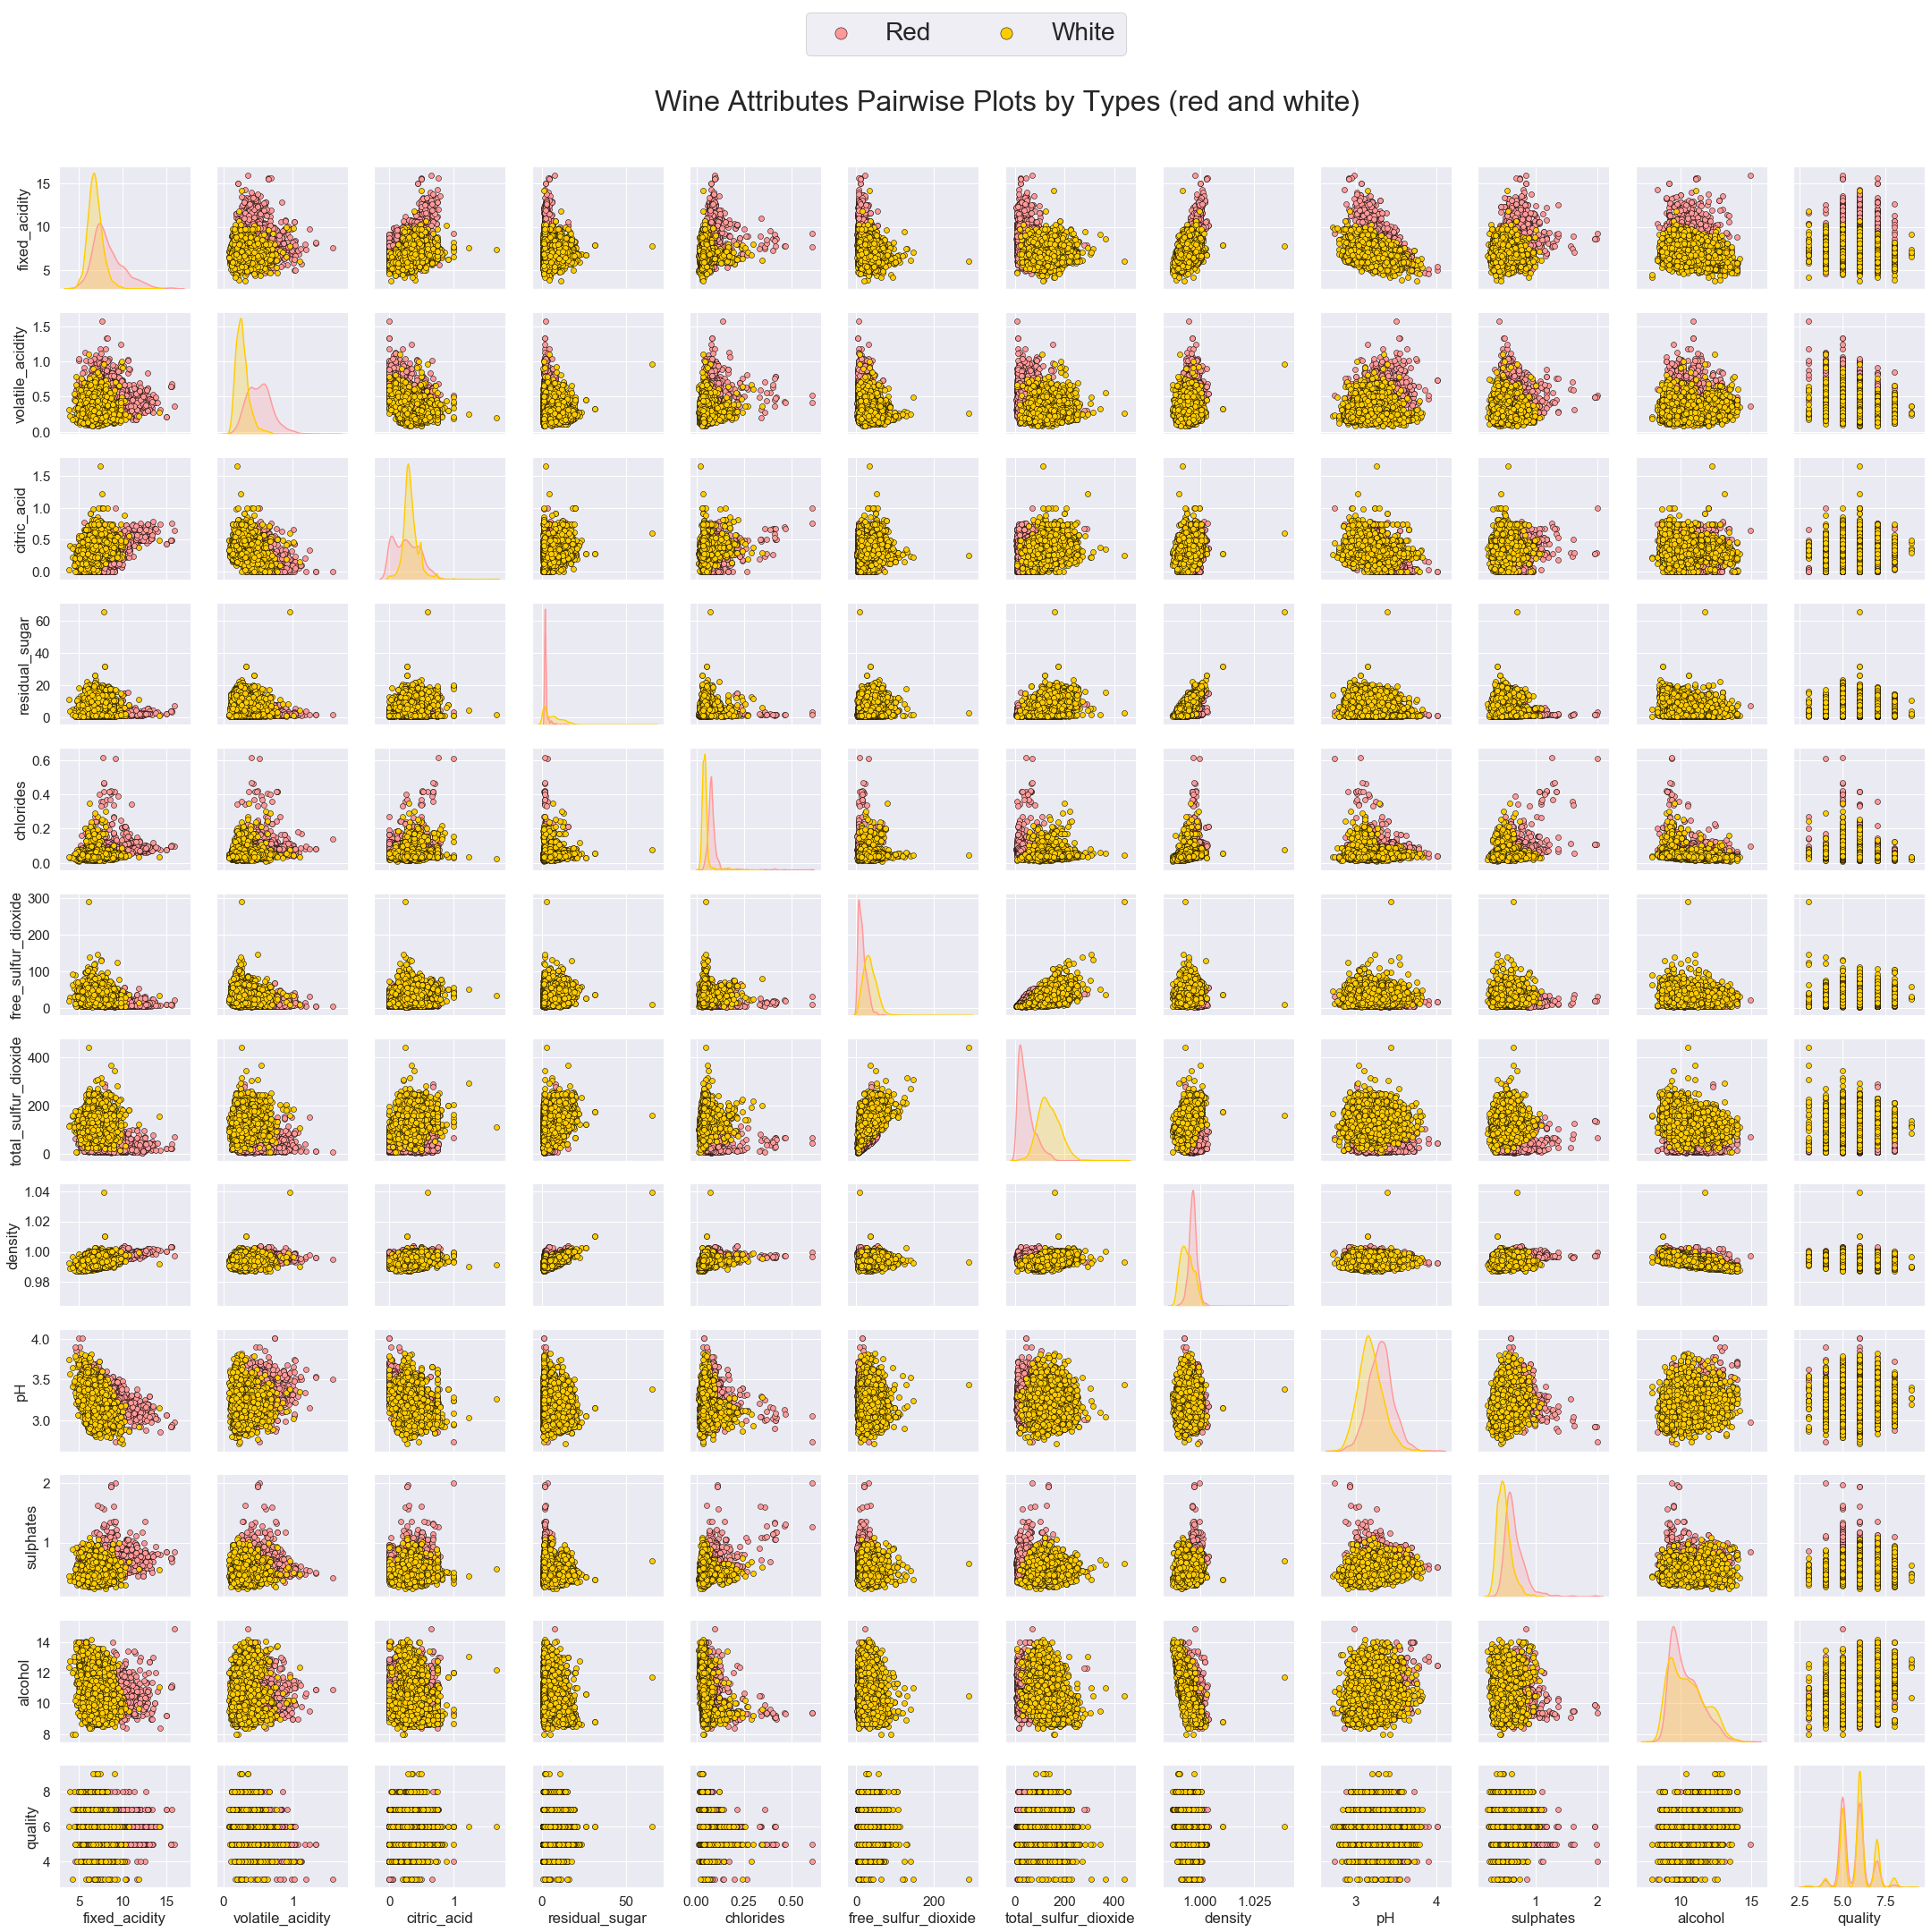

In [13]:
sns.set(font_scale=1.4)
g = sns.pairplot(data=wines.loc[:, wines.columns != 'quality_label'], hue='type', palette = {0: '#FF9999', 1: '#ffcc00'}, plot_kws=dict(edgecolor='black', linewidth=0.5))
fig = g.fig
g._legend.remove()
handles = g._legend_data.values()
labels = ['Red', 'White']
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=4, markerscale=2.2, fontsize=28)
fig.subplots_adjust(top=0.91, wspace=0.2)
t = fig.suptitle('Wine Attributes Pairwise Plots by Types (red and white)', y=0.95, fontsize=32)

del g, fig, t

From the pair plot above we can notice that there are more white wines than the red ones which is in alignment with the insights we showed earlier.

From the point of view of the patterns we can say that:

*  Residual sugar, total sulfur dioxide and citric acid in white wine seems to be much higher than red wine.
*  Sulphates, fixed acidity and volatile acidity seem to be higher in red wine as compared to white wine.
*  Density has a slightly strong negative correlation with alcohol, which is confirmed by the linear trend of the points from left to right in a decreasing (downward) direction.
*  Density has a slightly strong positive correlation with residual sugar, which is reinforced by two white wine outliers.

Let's see the correlation and pair plots from the perspective of quality.

#### 2.4.2 Check for correlations based on wines quality label

As did above, now it is the turn of the quality label. The goal of this section is to find and quantify the relationship between the features and *quality label*.

In [14]:
corr = wines.loc[:, wines.columns != "quality"].corr()
top_corr_cols = corr.quality_label.sort_values(ascending=False).keys()
corr = corr.loc[top_corr_cols, top_corr_cols]

x = y = corr.columns
corr = np.round(corr.to_numpy(), 2)

iu1 = np.triu_indices(len(x))
corr[iu1] = np.nan

colorscale = [[0.0, '#3f7f93'],
              [0.071, '#5890a1'],
              [0.143, '#72a1b0'],
              [0.214, '#8cb3bf'],
              [0.286, '#a7c5cf'],
              [0.357, '#c0d6dd'],
              [0.429, '#dae8ec'],
              [0.5, '#f2f2f2'],
              [0.571, '#f7d7d9'],
              [0.643, '#f2bcc0'],
              [0.714, '#eda3a9'],
              [0.786, '#e8888f'],
              [0.857, '#e36e76'],
              [0.929, '#de535e'],
              [1.0, '#d93a46']]
hovertext = [[f'corr({x[i]}, {x[j]})= {corr[i][j]:.2f}' if i>j else '' for j in range(len(x))] for i in range(len(x))]

trace = go.Heatmap(x=x, y=y, xgap=1, ygap=1, hovertext=hovertext,
                  hoverinfo='text',colorbar_thickness=20,
                  colorbar_ticklen=3, z=np.round(corr, 2), showscale=False, colorscale=colorscale)

annotations = go.Annotations()
for n, row in enumerate(corr):
    for m, val in enumerate(row):
        if not np.isnan(val):
            annotations.append(go.Annotation(text=str(corr[n][m]), x=x[m], y=y[n],
                                         xref='x1', yref='y1', showarrow=False))

#title_x posso spostare il titolo
layout = go.Layout(title = "Heatmap based on wine quality labels",xaxis_showgrid=False, annotations=annotations,width=950,margin = dict(l = 130),
                   template="none",yaxis_showgrid=False, yaxis_autorange='reversed')

fig = go.Figure(data=go.Data([trace]), layout=layout)

fig.show()
del corr, top_corr_cols

We can notice that:
* Alcohol has a high correlation (0.39) with the quality label.
* Lower density values in wines with good quality ratings.
* Lower levels of chlorides in wines with good quality ratings.
* The highest correlation, 0.72, is seen between total and free sulfur dioxide, which is expected, but the two measures have low correlation and in opposite directions with the quality (0.01 and -0.05). So, we will treat this if necessary when we check the multicollinearity.
* With the exception of density and alcohol, the other features do not have a high correlation with respect to quality labels.

Pair plots are also useful to capture all possible "trends" between each pair of features.

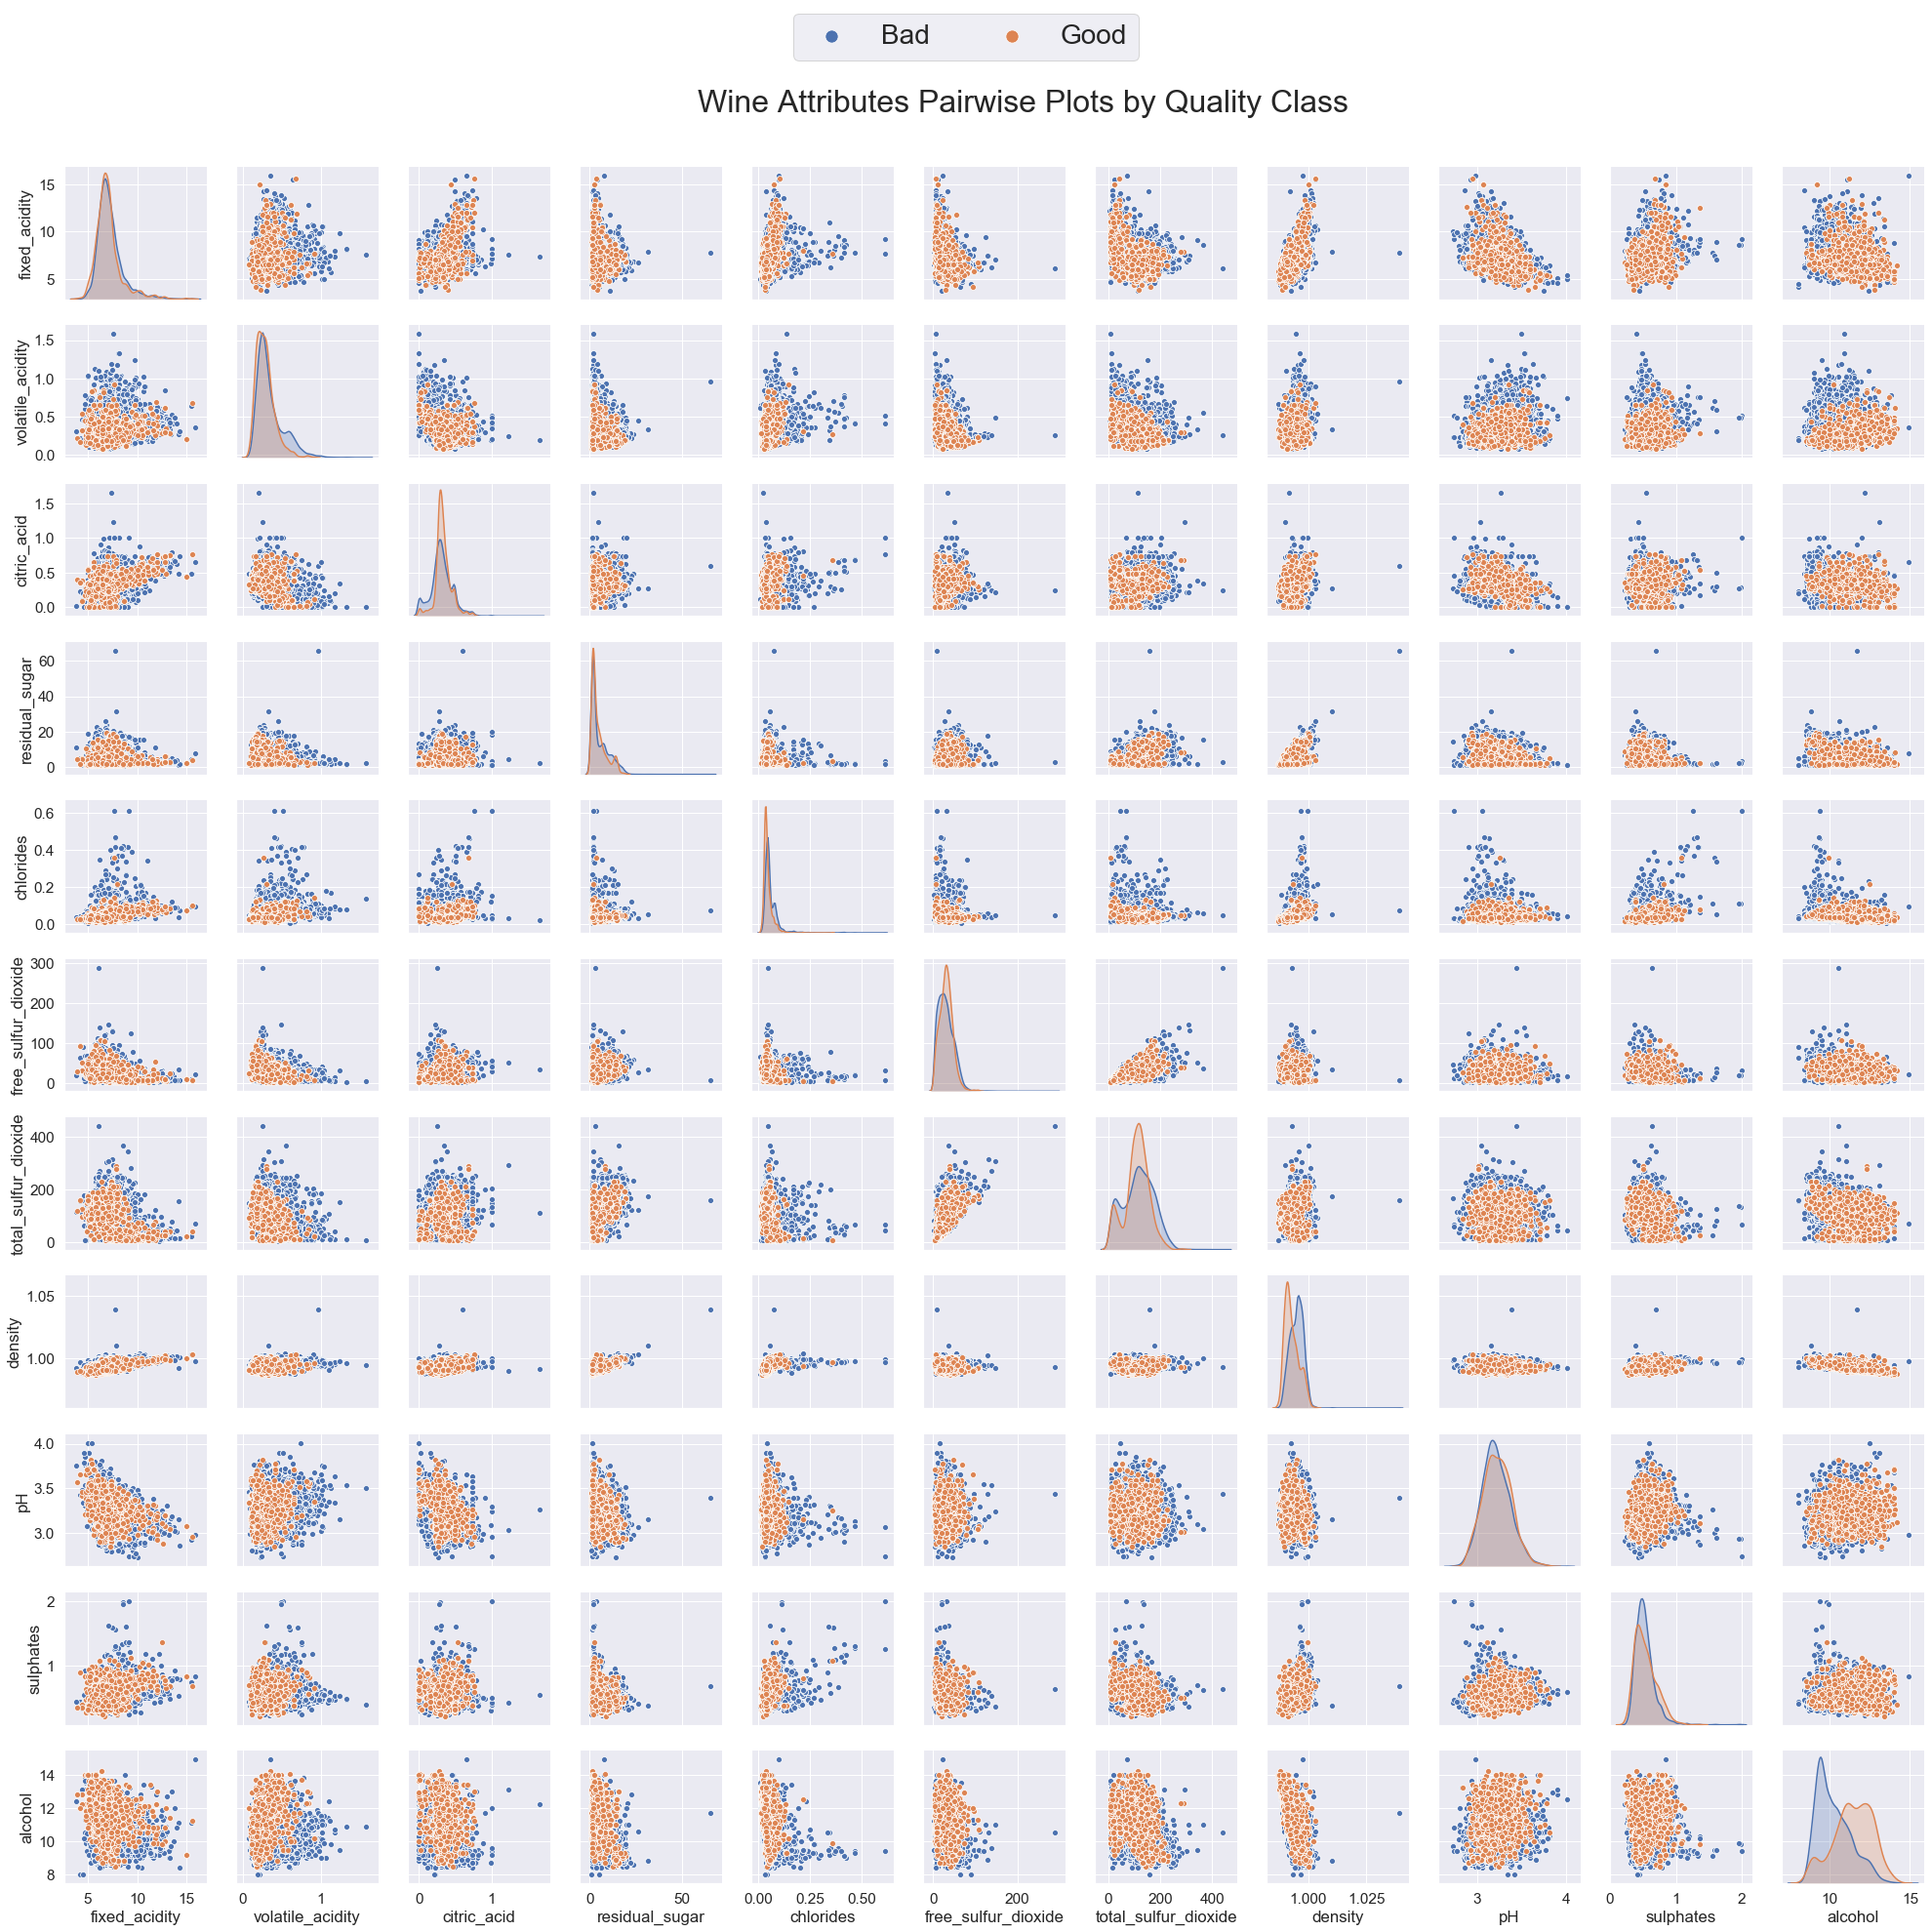

In [15]:
sns.set(font_scale=1.4)
g = sns.pairplot(data=wines.loc[:, (wines.columns != 'quality') & (wines.columns != "type")], hue='quality_label') #.sort_values(by=['quality_label'])

fig = g.fig 
g._legend.remove()
handles = g._legend_data.values()
labels = ['Bad', 'Good']
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=4, markerscale=2.2, fontsize=28)
fig.subplots_adjust(top=0.91, wspace=0.2)
t = fig.suptitle('Wine Attributes Pairwise Plots by Quality Class', y=0.95, fontsize=32)

plt.show()

del g, fig, t

Now I want to elaborate more the relationship between *residual sugar* and *density* and between *fixed_acidity* and *citric_acid*:

In [16]:
fig = make_subplots(rows=1, cols=2)
reg = LinearRegression().fit(np.vstack(wines.density), wines.residual_sugar)
fg = reg.predict(np.vstack(wines.density))
# Add traces
fig.add_trace(go.Scatter(x=wines.density, y=wines.residual_sugar, mode='markers', name='markers'), row=1, col=1)
fig.add_trace(go.Scatter(name='line of best fit', x=wines.density, y=fg, mode='lines', line=dict(dash='dash')), row=1, col=1)
fig.update_xaxes(title="Density", row=1, col=1)
fig.update_yaxes(title="Residual Sugar", row=1, col=1)
# Add traces
reg = LinearRegression().fit(np.vstack(wines.fixed_acidity), wines.citric_acid)
fg = reg.predict(np.vstack(wines.fixed_acidity))
fig.add_trace(go.Scatter(x=wines.fixed_acidity, y=wines.citric_acid, mode='markers', name='markers'), row=1, col=2)
fig.add_trace(go.Scatter(name='line of best fit', x=wines.fixed_acidity, y=fg, mode='lines', line=dict(dash='dash')), row=1, col=2)
fig.update_xaxes(title="Fixed Acidity", row=1, col=2)
fig.update_yaxes(title="Citric Acid", row=1, col=2)
fig.update_layout(showlegend=False, width=900, annotations=[
        dict(
            x=1.03,
            y=36.4,
            xref="x1",
            yref="y1",
            text="Best fit line",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-50
        ),dict(
            x=15,
            y=0.602,
            xref="x2",
            yref="y2",
            text="Best fit line",
            showarrow=True,
            arrowhead=7,
            ax=0,
            ay=-50
        ),
    ])
fig.show()

This graph proves what we said before about the positive correlation (0.55) between density and residual sugar. If we think about the meaning of the density we understand better what emerges from the graph. If we have more concentration of sugar, the wine will be more concentrated and therefore with higher density.

In the second graph, the correlation is lower than before (0.32) and for this reason, the linear positive relationship is less evident but still present.

In [17]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.75, 0.25], horizontal_spacing=.05)
fig.add_trace(go.Box(
    y=wines[wines['type'] == 0].loc[:, "alcohol"].values,
    x=wines[wines['type'] == 0].loc[:, "quality"].values + .17,
    name='Red Wine', marker_color='DarkSlateGrey', fillcolor="#c71f37"), row=1, col=1)
fig.add_trace(go.Box(
    y=wines[wines['type'] == 1].loc[:, "alcohol"],
    x=wines[wines['type'] == 1].loc[:, "quality"] + .17,
    name='White Wine', fillcolor='#ffe066', marker_color='DarkSlateGrey'), row=1, col=1)

fig.add_trace(go.Box(
    y=wines[wines['type'] == 0].loc[:, "alcohol"],
    x=wines[wines['type'] == 0].loc[:, "quality_label"]-0.17,
    name='Red Wine', marker_color='DarkSlateGrey', fillcolor="#c71f37"), row=1, col=2)
fig.add_trace(go.Box(
    y=wines[wines['type'] == 1].loc[:, "alcohol"],
    x=wines[wines['type'] == 1].loc[:, "quality_label"]-0.17,
    name="White Wine", fillcolor='#ffe066', marker_color='DarkSlateGrey'), row=1, col=2)
 
fig.update_layout(
    showlegend=False,
    width=1000,
    height=390,
    paper_bgcolor='rgba(0,0,0,0)',
    yaxis_title='Alcohol',
    boxmode='group')
fig.update_xaxes(title="Quality", ticktext=[3,4,5,6,7,8,9], tickvals=[3,4,5,6,7,8,9], row=1, col=1)
fig.update_xaxes(range=[-0.5, 1.5], title="Quality Class", ticktext=["Bad","Good"], tickvals=[0, 1], row=1, col=2)
fig.show()

Each box plot above depicts the distribution of alcohol level for each wine quality rating separated by wine types. We can clearly observe that alcohol has an increasing trend based on higher quality rated wine samples.

We can see that for *quality=5* there are many points above the upper fence or in case of *quality=9* the points are under the lower fence. We can consider these points as outliers and they require more studies that we will do later.

Let's see visualizing relationships between wine types, quality and acidity:

In [18]:
fig = make_subplots(rows=1, cols=2, column_widths=[0.70, 0.3], horizontal_spacing=.15)

fig.add_trace(go.Violin(
    y=wines[wines['type'] == 0].loc[:, "volatile_acidity"], meanline_visible=True,
    x=wines[wines['type'] == 0].loc[:, "quality"],
    legendgroup='Red', scalegroup='Red', name='Red Wine',side='negative', marker_color='DarkSlateGrey',fillcolor="#c71f37"), row=1,col=1)
fig.add_trace(go.Violin(
    y=wines[wines['type'] == 1].loc[:, "volatile_acidity"], meanline_visible=True,
    x=wines[wines['type'] == 1].loc[:, "quality"], legendgroup='White', scalegroup='White', name='White Wine', side='positive',
    fillcolor='#ffe066', marker_color='DarkSlateGrey'),row=1,col=1)

fig.add_trace(go.Violin(
    y=wines[wines['type'] == 0].loc[:, "volatile_acidity"], meanline_visible=True,
    x=wines[wines['type'] == 0].loc[:, "quality_label"], legendgroup='Red', scalegroup='Red', name='Red Wine',side='negative',
    marker_color='DarkSlateGrey',fillcolor="#c71f37"), row=1,col=2)
fig.add_trace(go.Violin(
    y=wines[wines['type'] == 1].loc[:, "volatile_acidity"],
    x=wines[wines['type'] == 1].loc[:, "quality_label"], meanline_visible=True,
    legendgroup='White', scalegroup='White', name='White Wine', side='positive',
    fillcolor='#ffe066', marker_color='DarkSlateGrey'),row=1,col=2)
fig.update_layout(
    showlegend=False,
    paper_bgcolor='rgba(0,0,0,0)',
    width=1020,
    height=390,
    yaxis_title='Volatile Acidity',
    xaxis_title='Quality',
    xaxis2_title="Quality Class",
    yaxis2_title="Volatile Acidity",
    violingap=0, 
    violinmode='overlay')
fig.update_traces(points=False)
fig.update_xaxes(ticktext=["3","4","5","6","7","8","9"], tickvals=[3,4,5,6,7,8,9], range=[2.5, 9.5], showgrid=False, row=1, col=1)
fig.update_xaxes(ticktext=["Bad", "Good"], tickvals=[0, 1], range=[-0.28, 1.3], showgrid=True, row=1, col=2)
fig.show()

It is quite evident that red wine samples have higher acidity as compared to its white wines counterparts. Also, we can see an overall decrease in acidity with higher quality wine for red wine samples but not so much for white wine samples.

Now we have a clear idea about the distributions of our data. Therefore, we are ready to move on the data engineering using informations we have collected so far.

## **3. Data Engineering - Cleaning, Transforming, Selection and Reduction**

After the data exploration and analysis, we have to work with data. 
We will do the following operations:
* *Cleaning*: to boost the performance of our model we need to remove "strange" points. With "strange" points we mean all the points that are classified as errors or points with unusual values. For example, if we have a density of -1 of course we remove this sample because we cannot have a negative density!
* *Transforming*: our data are not normal so it is better to transform them using BoxCox transformation.
* *Selection and Reduction*: not all features are important and we will study the importance of each feature and the effects of the Principal Component Analysis on the performance.

### **3.1 Adding a new feature: mSO2**

It is a good practice, if we know the topic of the data we are working on, to add useful features.

Doing research on the internet, I found the Santa Rosa article that explains the relationship between *pH* and *free sulfur dioxide*, introducing a new feature that is relevant for the wine quality and corresponds to the number of molecules of $SO_2$. Therefore, I created this new feature following the indicated formula:<br><br>
<center><font size="4">$m_{SO_{2}} = \frac{free \, sulfur\,dioxide}{1+10^{pH - 1.81}}$</font></center>

*Link: [Santa Rosa Article](http://srjcstaff.santarosa.edu/~jhenderson/SO2.pdf)*

**Is it useful?**

After the creation of this feature, I want to know if it is truly helpful or not. Later we will see the correlation coefficient but now I want to focus more on the graphic aspect.

Boxplots are usually used to check how the values of a feature are distributed to remove or analyse outliers. In this case, I think that it is a simple and good way to show how this new feature is distributed considering red wines (first image) and then all wines.

For each plot, I separate bad wines from the good ones in order to better understand if there is a relationship between the values and the quality labels.

In [19]:
wines['mso2'] = wines['free_sulfur_dioxide']/(1+10**(wines['pH'] - 1.81)) 
wine_red['quality_label'] = wine_red.quality.apply(score_to_label)
wine_red['mso2'] = wine_red['free_sulfur_dioxide']/(1+10**(wine_red['pH'] - 1.81)) 

fig = make_subplots(rows=1, cols=2, subplot_titles=['Red wines', 'All wines'])
# 1st
fig.add_trace(go.Box(y=wine_red.loc[wine_red.quality_label == 0, 'mso2'],
                     marker_color = '#4c72b0'), row=1, col=1)
fig.add_trace(go.Box(y=wine_red.loc[wine_red.quality_label == 1, 'mso2'],
                     marker_color = '#dd8452'), row=1, col=1)
#2nd
fig.add_trace(go.Box(y=wines.loc[wines.quality_label == 0, 'mso2'],
                     marker_color = '#4c72b0'), row=1, col=2)
fig.add_trace(go.Box(y=wines.loc[wines.quality_label == 1, 'mso2'],
                     marker_color = '#dd8452'), row=1, col=2)

fig.update_xaxes(ticktext=["Bad", "Good"], tickvals=[0, 1], title="Quality Class", row=1, col=1)
fig.update_yaxes(title="$m_{SO_2}$", row=1, col=1)
fig.update_yaxes(title="$m_{SO_2}$", row=1, col=2)
fig.update_xaxes(ticktext=["Bad", "Good"], tickvals=[0, 1], title="Quality Class", row=1, col=2)
fig.update_layout(width=800,height=450,showlegend=False, paper_bgcolor='rgba(0,0,0,0)')
fig.show()

The results show two different behaviours. In the first image, we are considering only the red wines and seems that good wines have less $m_{SO_2}$ compared to the bad ones.

This behaviour is less evident when we consider all the wines (second plot). We can notice that the maximum value of $m_{SO_2}$ for the red wines is 3.36 but in the second graph, the maximum value is 9. The reason was explained before, white wines have more *free sulfur dioxide* compared to the red ones and therefore more molecules of $SO_2$.

In conclusion, we observed the values which are assumed by this feature and later we will check if it is important and how important it is. 

### **3.2 Box-cox transformation of highly skewed features**

A Box-Cox transformation is a way to transform non-normal data distribution into a normal shape.

Why does this matter?
*  **Model bias and spurious interactions**: If we are performing regression or any statistical modelling, this asymmetrical behaviour may lead to a bias in the model. 
*  **Normality is an important assumption for many statistical techniques**: such as t-tests and analysis of variance (ANOVA). A substantial departure from normality will bias our capability estimates.

One solution to this is to transform our data into a normal shape using a Box-Cox transformation so we are able to run a broader number of tests.

At the core of the Box-Cox transformation there is an exponent, lambda ($\lambda$), which varies from -5 to 5. All values of $\lambda$ are considered and the optimal value for our data is selected; The 'optimal value' is the one which results in the best approximation of a normal distribution curve. The transformation of $y$ has the form: <br><br>
<center>
$ y(\lambda) =
  \begin{cases}
    \frac{y^\lambda - 1}{\lambda}   & \quad \text{if } \lambda \neq 0;\\
    log(y)   & \quad \text{if } \lambda = 0;\\
  \end{cases}$</center>

The SciPy implementation proceeded with this formula, then we need before to take care of negatives values if we have. A common technique for handling negative values is to add a constant value to the data before applying the $log$ transform. The transformation is therefore $log(y+a)$ where $a$ is a constant. In this way, Box and Cox did propose a second formula that can be used for negative $y$-values, not implemented in SciPy:<br><br>
<center>
$ y(\lambda) =
  \begin{cases}
    \frac{(y+\lambda_2)^{\lambda_1} - 1}{\lambda_1}   & \quad \text{if } \lambda_1 \neq 0;\\
    log(y + \lambda_2)   & \quad \text{if } \lambda_1 = 0;\\
  \end{cases}$</center>

<br>

In the implementation of Box-Cox in SciPy, if the parameter $\lambda$ is not specified, SciPy will find the $\lambda$ that maximizes the log-likelihood function.
In my implementation I let SciPy choose and pick the right value of $\lambda$ in order to achieve the best result.

**Train and Test data** <br>
In this section, it is time to separate training data from the test ones. I selected to use the 25% of the samples as a test set, therefore, we have 75% of the data as the training set.

**How do we maintain the proportions between the two classes after the split?** <br>
There is an interesting function called *StratifiedSplit* that separate the data in 2 splits (train/test) maintaining the proportion between the classes in each set.


Since we are transforming data, it is important to divide them in train and test set before applying this transformation. The reason is that if we split data later, the system will find the optimal value of $\lambda$ according to the test samples and it is not the right way. Test data are points that we assume unknown and if we use them to find the best parameter, in a certain manner, we are using data which we should not have. I cannot retrieve any information from the test because in this way our model is able to generalize better. The same procedure is done for the StandardScale where we fit the instance with the train data and then transform the test set.

In [22]:
X = wines.loc[:, (wines.columns != 'quality') & (wines.columns != "quality_label")]
y_l = wines.loc[:, 'quality_label'].values
y_t = wines.loc[:, 'type'].values
y_q = wines.loc[:, 'quality'].values

#---- Classification ----#
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=seed)
for train_index, test_index in sss.split(X, y_l):
    X_train_all, X_test_all = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y_l[train_index], y_l[test_index]
    y_train_t, y_test_t = y_t[train_index], y_t[test_index]

#---- Regressor ----#
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=seed)
for train_index, test_index in sss.split(X, y_q):
    X_train_all_reg, X_test_all_reg = X.iloc[train_index], X.iloc[test_index]
    y_train_q, y_test_q = y_q[train_index], y_q[test_index]

#---Classification ----#
numeric_features = list(X_train_all.columns)
numeric_features = [e for e in numeric_features if e not in ('type','quality','quality_label','density','total_sulfur_dioxide')]
skewed_features = X_train_all[numeric_features].apply(lambda x : skew (x.dropna()))
old_kurt = X_train_all[numeric_features].apply(lambda x : kurtosis(x.dropna()))
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness = skewness.dropna()
fitted_lambda = {}
for feat in skewness.index:
    X_train_all[feat], fitted_lambda[feat] = boxcox((X_train_all[feat]+1))
    X_test_all[feat] = boxcox((X_test_all[feat]+1), fitted_lambda[feat])

skewed_features2 = X_train_all[skewness.index].apply(lambda x : skew (x.dropna()))
new_kurt = X_train_all[skewness.index].apply(lambda x: kurtosis(x.dropna())) 
#compute skewness
skewness2 = pd.DataFrame({'Kurtosis': old_kurt, 'New Skew' :skewed_features2, 'New Kurtosis': new_kurt})   
display(pd.concat([skewness, skewness2], axis=1).sort_values(by=['Skew'], ascending=False))

#---Regressor ----#
numeric_features = list(X_train_all.columns)
numeric_features = [e for e in numeric_features if e not in ('type','quality','quality_label','density','total_sulfur_dioxide')]
skewed_features = X_train_all_reg[numeric_features].apply(lambda x : skew (x.dropna()))
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness = skewness.dropna()
fitted_lambda = {}
for feat in skewness.index:
    X_train_all_reg[feat], fitted_lambda[feat] = boxcox((X_train_all_reg[feat]+1))
    X_test_all_reg[feat] = boxcox((X_test_all_reg[feat]+1), fitted_lambda[feat])

Skew   Kurtosis  New Skew  New Kurtosis
chlorides            5.554136  55.940462  0.183306     -0.318051
sulphates            1.770286   8.527967  0.007386     -0.083493
fixed_acidity        1.704963   4.897945 -0.063378      1.101631
residual_sugar       1.553318   5.854383  0.138381     -1.343502
volatile_acidity     1.482504   2.860969  0.109513     -0.577341
mso2                 1.292899   2.977564  0.035240     -0.776851
free_sulfur_dioxide  0.758968   1.057832 -0.057567     -0.435442
alcohol              0.549323  -0.559529  0.068098     -0.980950
citric_acid          0.538521   2.819916  0.004903      1.255817
pH                   0.405175   0.445194 -0.001557      0.045161

As we can see from the table above, with Box-Cox transformation we have a significant decrease in the skew and kurtosis for all the features indicated. This means that now we have features with a distribution more similar to the normal one. It is important to repeat that **having less skew is not equal to being normal** but only that the distribution is probably closer to being normal than before.

#### 3.2.1 Normality assumptions

The tests assume that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or $H_0$. A threshold level is chosen called alpha ($\alpha$), typically 5% (or 0.05), that is used to interpret the p-value.

In the SciPy implementation of these tests, we can interpret the p-value as follows:
* p $\leq$ $\alpha$: reject $H_0$, not normal.
* p $>$ $\alpha$: fail to reject $H_0$, normal.

This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution.

A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given the available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

Therefore, I tried with different tests to check if features are normally distributed. 
There many tests provided by SciPy for example:
* *Shapiro-Wilk*: it is the most popular test but it is sensitive to sample size. For small samples, even big departures from normality are not detected while for large samples small deviations from normality will lead to the null hypothesis being rejected.<br><br>
<center><font size="4">$W = \frac{(\sum_{i=1}^{n} a_i x_{(i)})^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$</font></center>
<br>
* *D'Agostino $K^2$*: it is a test based on the skewness and kurtosis. It simply doesn't perform quite as well overall. If there are differences in skewness or kurtosis, it's an excellent test, often display quite good power, but not every non-normal distribution differs substantively in skewness or kurtosis. Indeed it's a trivial matter to find distinctly non-normal distributions with the same skewness and kurtosis as the normal.

Now for each feature, I do both tests to see the differences:

In [23]:
f_l = list()
p_l = list()
n_l = list()
s_l = list()
for name in list(X_train_all.columns):
    if name == 'type' or name.startswith('quality'):
        continue
    f_l.append(name)
    p, n = is_normal(np.array(X_train_all[name]))
    a, b = shapiro(np.array(X_train_all[name]))

    if b > alpha:
        s_l.append("Acept $H_0$, normal")
    else:
        s_l.append("Reject $H_0$, not normal")
    p_l.append(p)
    n_l.append(n)

display(pd.DataFrame({'Feature' : f_l, 'P-value': p_l, 'D\'Agostino Test': n_l, 'Shapiro Test': s_l}))

Feature        P-value           D'Agostino Test  \
0          fixed_acidity   3.503925e-25  Reject $H_0$, not normal   
1       volatile_acidity   4.021998e-33  Reject $H_0$, not normal   
2            citric_acid   5.507372e-29  Reject $H_0$, not normal   
3         residual_sugar   0.000000e+00  Reject $H_0$, not normal   
4              chlorides   7.676304e-13  Reject $H_0$, not normal   
5    free_sulfur_dioxide   3.838094e-15  Reject $H_0$, not normal   
6   total_sulfur_dioxide   5.055190e-41  Reject $H_0$, not normal   
7                density  3.111037e-242  Reject $H_0$, not normal   
8                     pH   7.911025e-01       Acept $H_0$, normal   
9              sulphates   4.807780e-01       Acept $H_0$, normal   
10               alcohol  4.652302e-218  Reject $H_0$, not normal   
11                  mso2   8.441621e-81  Reject $H_0$, not normal   

                Shapiro Test  
0   Reject $H_0$, not normal  
1   Reject $H_0$, not normal  
2   Reject $H_0$, not normal  
3   Reject $H_0$, not normal  
4   Reject $H_0$, not normal  
5   Reject $H_0$, not normal  
6   Reject $H_0$, not normal  
7   Reject $H_0$, not normal  
8   Reject $H_0$, not normal  
9   Reject $H_0$, not normal  
10  Reject $H_0$, not normal  
11  Reject $H_0$, not normal

As we said before, Shapiro test is more severe because it rejects $H_0$ for all features whereas D'Agostino says that only *pH* and *sulphates* have a normal shape as we will see in the graphs.

In general, we were able to bring most numerical values closer to normal and in the next graph, we will compare the distribution of each feature with the normal one.

An important tool that we can use is the QQ plot, where we can compare the distribution of a sample to a theoretical distribution, such as the standard normal distribution N(0,1). 
From these graphs, we can see whether the data are approximately normal or not.

So, let's take a look at the QQ test of these features.

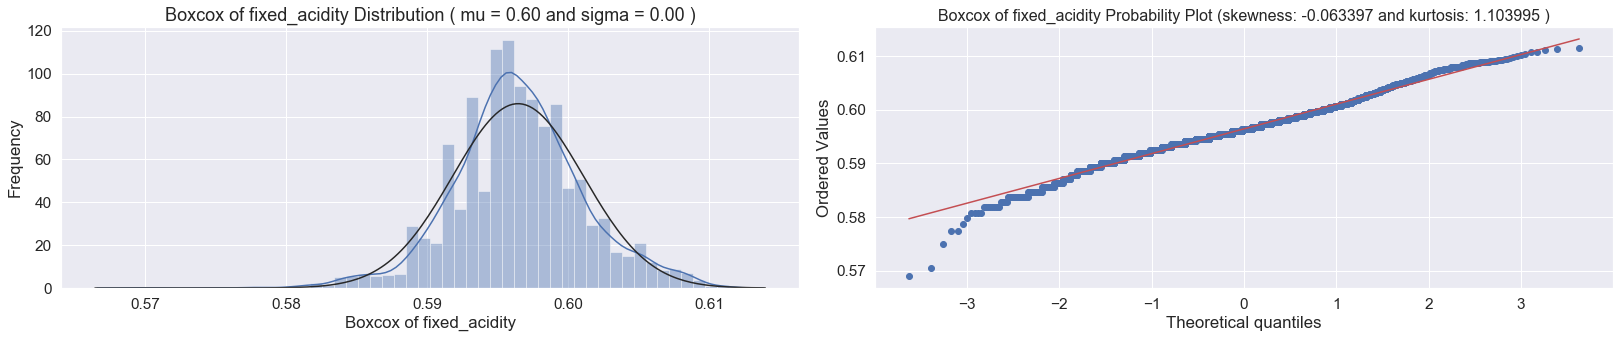

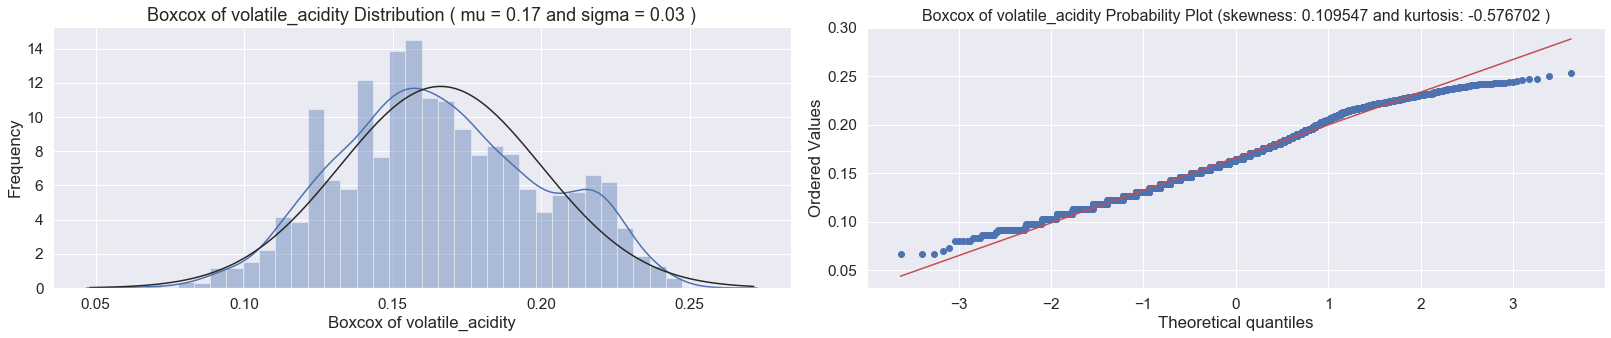

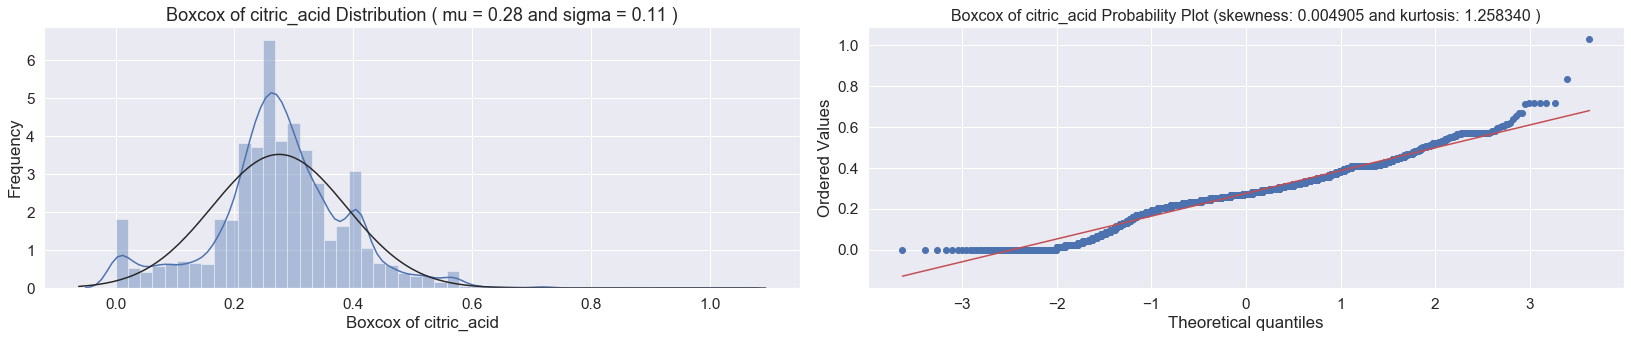

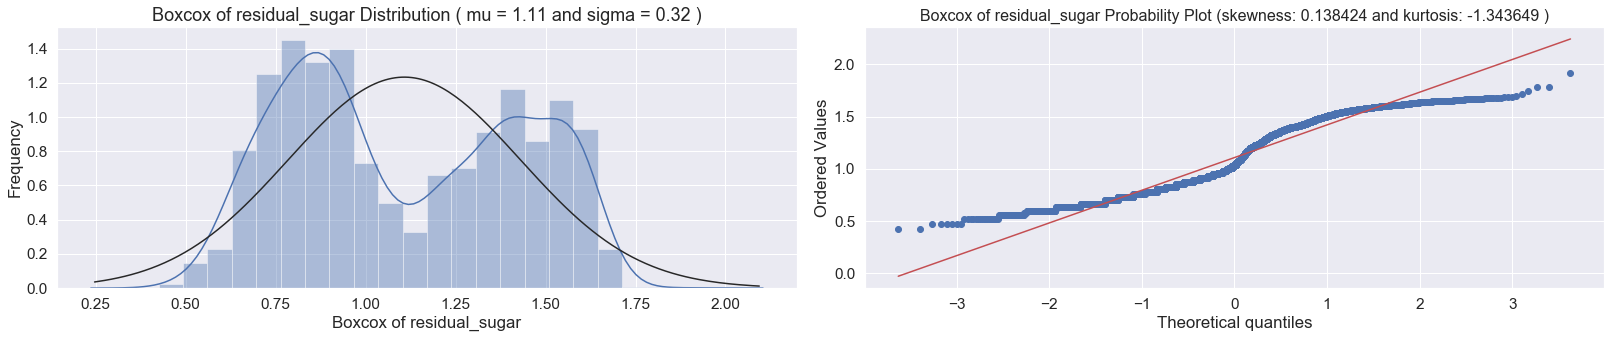

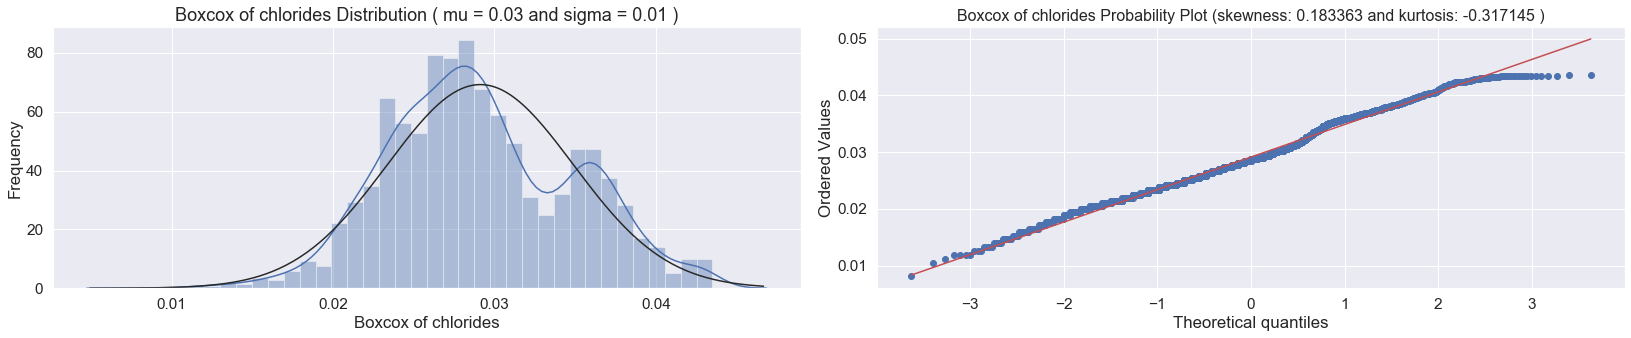

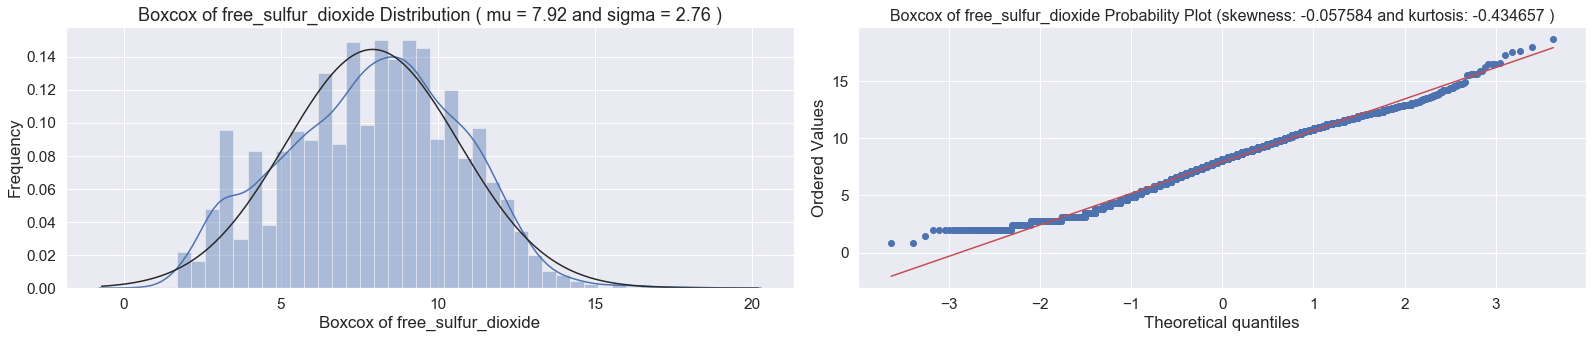

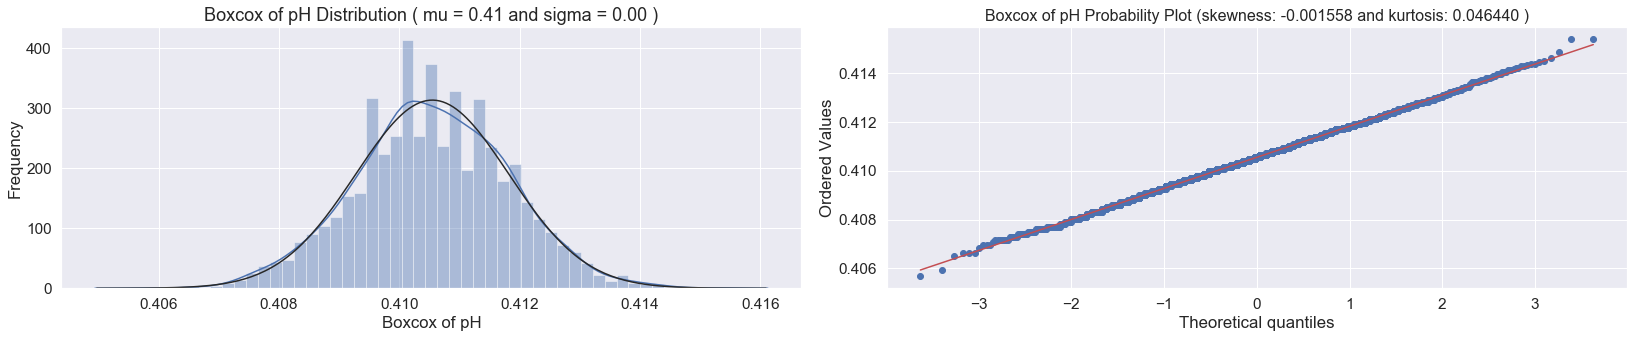

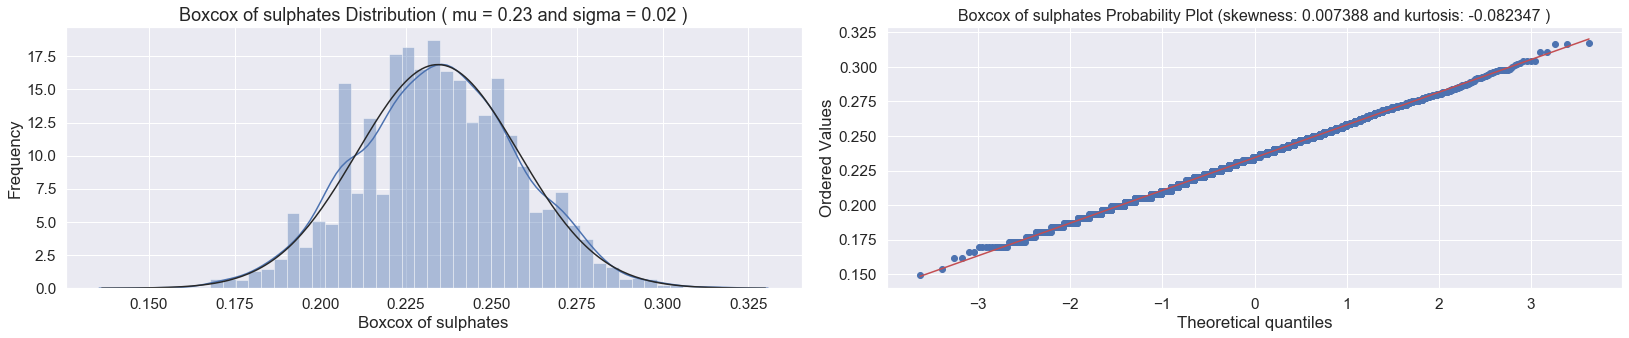

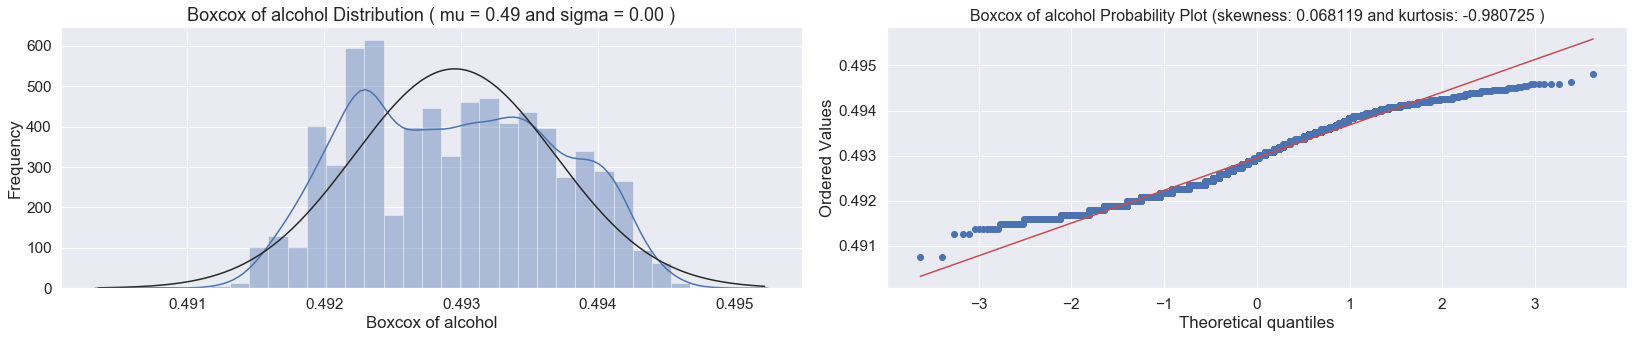

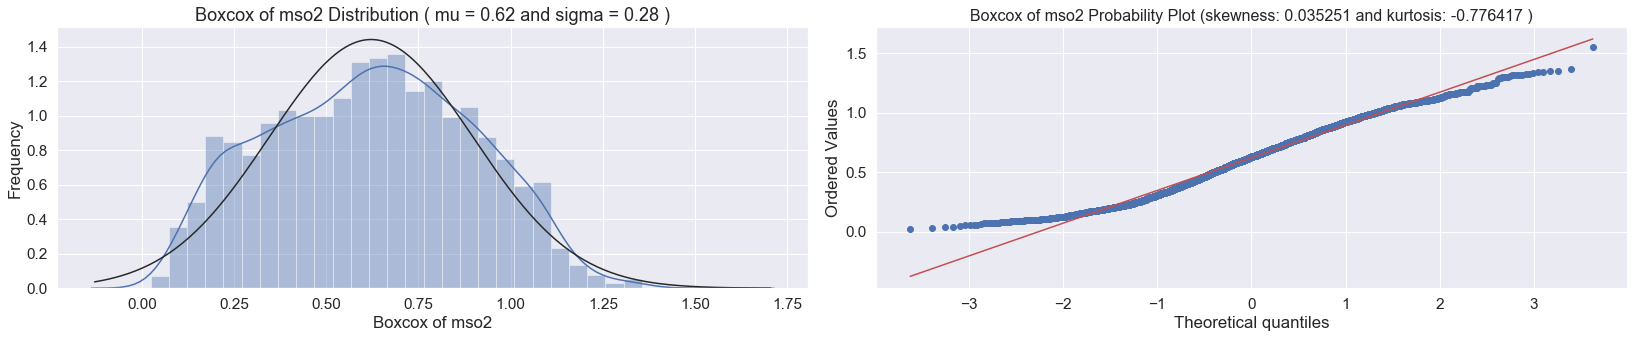

In [24]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(23,5))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center', fontsize=18)
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center', fontsize=16)

    plt.tight_layout()
    plt.show()

for feat in skewness.index:
    QQ_plot(X_train_all[feat], ('Boxcox of {}'.format(feat)))

As we can see, in addition to having presented significant improvements, they present interesting distributions as we can observe in their respective graphs.
The only feature which appears far from being normal is the *residual sugar* whereas all the others seems improved. 

In conclusion, QQ plot does not say anything about if a feature has a truly normal distribution or not (we need a statistical test to say that) but it is a tool used to show how much a distribution is far from normality.  
So, we can continue to apply the BoxCox on these features.

### **3.3 Identify and treat multicollinearity**

**Multicollinearity** is more troublesome to detect because it emerges when two or more variables, which are highly correlated, are included within a model, leading to unreliable and unstable estimates of regression coefficients. To make matters worst multicollinearity can emerge even when isolated pairs of variables are not collinear.

To identify, we need start with the coefficient of determination, $R^2$, is the square of the Pearson correlation coefficient R. The coefficient of determination, concerning correlation, is the proportion of the variance that is shared by both variables. It gives a measure of the amount of variation that can be explained by the model (the correlation is the model).

Already the **Variance Inflation Factor (VIF)** is a measure of collinearity among predictor variables within a multiple regression. It is maybe calculated for each predictor by doing a linear regression of that predictor on all the other predictors, and then obtaining the $R^2$ from that regression. It is calculated by taking the ratio of the variance of all a given model's betas divided by the variance of a single beta: 
<br><br><font size="4"><center>$VIF_i = \frac{1}{1-R_i^2}$.</center></font>

The VIF has a lower bound of 1 but no upper bound. Authorities differ on how high the VIF has to be to constitute a problem (e.g.: 2.50 ($R^2$ equal to 0.6), sometimes 5 ($R^2$ equal to .8), or greater than 10 ($R^2$ equal to 0.9) and so on). For this project, I consider as a threshold VIF=5.

Given the potential for correlation among the predictors, we'll display the variance inflation factors (VIF), which indicate the extent to which multicollinearity is present in a regression analysis. Hence such variables need to be removed from the model. Deleting one variable at a time and then again checking the VIF for the model is the best way to do this.

So, we are going to remove one feature at the time and observe how the VIF factor changes.

In [25]:
def VRF(predict, data, y):
    
    scale = StandardScaler(with_std=False) # non voglio portare le varianze a 1 visto che non avrebbe senso
    df = pd.DataFrame(scale.fit_transform(data), columns=data.columns)

    features = "+".join(data.columns)
    df['quality_label'] = y.values

    # get y and X dataframes based on this regression:
    y, X = dmatrices(predict + ' ~' + features, data = df, return_type='dataframe')

    # Calculate VIF Factors: for each X, calculate VIF and save in dataframe
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["features"] = X.columns
    vif['correlation with quality_label'] = [np.round(df['quality_label'].corr(X[i]), 2) if i != 'Intercept' else '-' for i in X.columns]
    
    # Inspect VIF Factors
    display(vif.sort_values(['VIF Factor']))
    return vif

cols = wines.columns
df = wines.copy()
# Remove the not applied to the qualty classification task
cols = list(cols.drop(['quality_label', 'quality']))

vif = VRF('quality_label', df.loc[:, cols], df['quality_label'])

VIF Factor              features correlation with quality_label
0     1.000000             Intercept                              -
10    1.561446             sulphates                           0.03
3     1.622819           citric_acid                           0.05
5     1.662001             chlorides                          -0.16
2     2.172585      volatile_acidity                          -0.15
7     4.055065  total_sulfur_dioxide                          -0.05
1     5.252555         fixed_acidity                          -0.05
11    5.650221               alcohol                           0.39
9     5.816033                    pH                           0.03
12    7.266227                  type                           0.09
4     9.666763        residual_sugar                          -0.06
6    10.692393   free_sulfur_dioxide                           0.01
13   12.711260                  mso2                          -0.01
8    22.578410               density                          -0.28

We remove the features according to their VIF Factor and their correlation with *quality_label*, our goal is to find and remove features with a high VIF Factor and a low correlation in this way their removal will not have a high impact on the performance of the model.

As we can see in this table, there are five features with a VIF Factor greater than five and we must avoid this situation. A consideration that we could do is that *free_sulfur_dioxide* is already explained by the *total_sulfur_dioxide*, therefore, it has a high VIF Factor.

The new feature, as I expected, has a high VIF because in its formula we consider *pH* and *free_sulfur_dioxide* so the solution is to remove these features or only $m_{SO_2}$. Having a low correlation with the quality labels, makes me think that is not so useful as I was expected therefore for simplicity I will start removing it.  

In [26]:
cols.remove('mso2')
vif = VRF('quality_label', df.loc[:, cols], df['quality_label'])
del vif

VIF Factor              features correlation with quality_label
0     1.000000             Intercept                              -
10    1.555807             sulphates                           0.03
3     1.622151           citric_acid                           0.05
5     1.659342             chlorides                          -0.16
2     2.168159      volatile_acidity                          -0.15
6     2.235693   free_sulfur_dioxide                           0.01
9     2.563776                    pH                           0.03
7     4.045899  total_sulfur_dioxide                          -0.05
1     5.048348         fixed_acidity                          -0.05
11    5.616857               alcohol                           0.39
12    7.224467                  type                           0.09
4     9.634653        residual_sugar                          -0.06
8    22.337223               density                          -0.28

The values are now closer to five but *residual_sugar* and *density* are still above my threshold. 

Now the choice of the features that must be removed is subjective. I chose to remove *residual_sugar* because it has:
1. a low correlation with *quality_label*.
2. a shape very far from the normal (as we have seen before).

As indicated before, we cannot leave both the free and total sulfur dioxide. Again using internet, I found that for the quality of wines is better to control the quantity of *free_sulfur_dioxide*, therefore, I will remove the total quantity.

We could remove other features such as *fixed_acidity* because its removal should not become a problem as the acidity will be represented by *pH*.

However, for curiosity, I tried to remove different features but the scores were slightly lower than the ones we will obtain if we continue in this way.

In [27]:
cols.remove('total_sulfur_dioxide')
cols.remove('residual_sugar')

vif = VRF('quality_label', df.loc[:, cols], df['quality_label'])
def_cols = cols

X_train = X_train_all.loc[:, def_cols]
X_train_reg = X_train_all_reg.loc[:, def_cols]
X_test = X_test_all.loc[:, def_cols]
X_test_reg = X_test_all_reg.loc[:, def_cols]

del df, cols, vif

VIF Factor             features correlation with quality_label
0     1.000000            Intercept                              -
5     1.444909  free_sulfur_dioxide                           0.01
8     1.457704            sulphates                           0.03
3     1.605525          citric_acid                           0.05
7     1.616624                   pH                           0.03
4     1.631236            chlorides                          -0.16
2     2.086772     volatile_acidity                          -0.15
1     2.535524        fixed_acidity                          -0.05
9     2.574068              alcohol                           0.39
6     3.369611              density                          -0.28
10    3.725001                 type                           0.09

Now all seems right because all features have a low VIF Factor ($\leq 5$). 
We have identified the 10 features that we will use during the training of our model.

### **3.4 Removing Outliers**

Outliers are unusual values in our dataset and they can distort statistical analyses and violate their assumptions.

Another definition can be:
> In statistics, an outlier is an observation point that is distant from other observations.

From this definition, we can understand that an outlier could be for example a wrong value or a strange value that need more attention during the data exploration.
Speaking about this dataset in particular from the boxplot showed before we can think that there a lot of outliers.
There are many techniques to detect outliers and there are some actions that we can do about them, for example, usually, we remove them from the dataset or replace them with the mean/median.

For this project, I tried different algorithms to detect outliers because when we are in a situation like this, where we have few data, removing many points could afflict the performance.

Both the two approaches that I tested are based on the interquartile range rule. The main characteristic of these methods is:
1. In the first, I removed outliers.
2. In the second one, I replaced all the outliers with the median value.

#### 3.4.1 IQR

The interquartile range rule is useful in detecting the presence of outliers. Outliers are individual values that fall outside of the overall pattern of a dataset. This definition is somewhat vague and subjective, so it is helpful to have a rule to apply when determining whether a data point is truly an outlier. This is where the interquartile range rule comes in.

*What Is the Interquartile Range?*
Any set of data can be described by its five-number summary. These five numbers, which give us the information we need to find patterns and outliers, consist of (in ascending order):
* The minimum or lowest value of the dataset.
* The first quartile $Q_1$, which represents a quarter of the way through the list of all data.
* The median of the data set, which represents the midpoint of the whole list of data.
* The third quartile $Q_3$, which represents three-quarters of the way through the list of all data.
* The maximum or highest value of the data set.

The range, which is the minimum subtracted from the maximum, is one indicator of how spread out the data is in a set (note: the range is highly sensitive to outliers. If an outlier is also a minimum or maximum, the range will not be an accurate representation of the breadth of a dataset).

Therefore we introduce the interquartile range that is calculated in much the same way as the range. All we do to find it is subtract the first quartile from the third quartile:
$IQR = Q_3 – Q_1$.

The interquartile range shows how the data is spread about the median. It is less susceptible than the range to outliers and can, therefore, be more helpful.

**Using the Interquartile Rule to Find Outliers** <br>
Though it's not often affected much by them, the interquartile range can be used to detect outliers. This is done using these steps:
1. Calculate the interquartile range for the data.
2. Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
3. Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.
4. Subtract 1.5 x (IQR) from the first quartile. Any number less than this is a suspected outlier.

Remember that the interquartile rule is only a rule of thumb that generally holds but does not apply to every case.

As said before, I tried two different approaches to manage outliers. The first approach is to find outliers and remove them. Doing so, I will reduce the size of my dataset but since we have just a few data, it is not worth it. However, following this approach I deleted about 200-300 sample causing a drastic decrease in all evaluation metrics. A possible workaround is the extend the definition of 'outlier' in this sense: now I am using $Q_3$ (75%) and $Q_1$ (25%) but we can use as percentages 85% and 15% respectively. In this way, we have increased the range and for this reason, the number of detected outliers is only 17.

The second approach I implemented is based on the same formula as before but this time detected outliers are not removed but are replaced with the median of that feature. The advantage of this method is that we do not discard any sample but the disadvantage is that we modify sample and we must take care of this because this can change the nature of our dataset.

Our final implementation is based on the second approach because its score is slightly higher.

*Note: again in this case I was searching the outliers only within the training set. The reason is the same as before, we want to preserve the natural distribution of the test set and removing the outliers from the training in order to help the model to better generalize.*

In [28]:
# Second approach - Replace outliers with median
def outliers_median(data):
    percentile_15 = np.percentile(data, 15)
    percentile_85 = np.percentile(data, 85)
    lower_bound = percentile_15 - 1.5 * (percentile_85 - percentile_15)
    upper_bound = percentile_85 + 1.5 * (percentile_85 - percentile_15)
    points = []
    for index, point in enumerate(data):
        if point < lower_bound or point > upper_bound:
            points.append(np.nan)
        else:
            points.append(point)

    return np.nanmedian(np.array(points)), points

#---- Classification ----#
for col in X_train.columns:
    median, lista = outliers_median(X_train[col].to_numpy())
    X_train[col] = lista
    X_train[col].fillna(median, inplace=True)
for col in X_train_all.columns:
    median, lista = outliers_median(X_train_all[col].to_numpy())
    X_train_all[col] = lista
    X_train_all[col].fillna(median, inplace=True)

assert len(X_train) == len(X_train_all)

#---- Regressor ----#
for col in X_train.columns:
    median, lista = outliers_median(X_train_reg[col].to_numpy())
    X_train_reg[col] = lista
    X_train_reg[col].fillna(median, inplace=True)
for col in X_train_all.columns:
    median, lista = outliers_median(X_train_all_reg[col].to_numpy())
    X_train_all_reg[col] = lista
    X_train_all_reg[col].fillna(median, inplace=True)

assert len(X_train_reg) == len(X_train_all_reg)
# First apprach - Remove Outliers
#def outliers_detection(data):
#    data = np.array(data)
#    percentile_15 = np.percentile(data, 15)
#    percentile_85 = np.percentile(data, 85)
#    lower_bound = percentile_15 - 1.5 * (percentile_85 - percentile_15)
#    upper_bound = percentile_85 + 1.5 * (percentile_85 - percentile_15)
#    outliers = []
#    for index, point in enumerate(data):
#        if point < lower_bound or point > upper_bound:
#            outliers.append(index)
#    return outliers
#
#rows = []
#for col in X_train.to_numpy().T:
#    rows = rows + outliers_detection(col)
#
#righe = list(set(rows))
#print("Rilevati", str(len(righe)))
#all_cols = X_train_all.columns
#my_cols = X_train.columns
#X_train = np.delete(X_train.to_numpy(), righe, axis=0)
#X_train_notype = np.delete(X_train_notype.to_numpy(), righe, axis=0)
#y_train = np.delete(y_train, righe, axis=0)
#y_train_q = np.delete(y_train_q, righe, axis=0)
#y_train_t = np.delete(y_train_t, righe, axis=0)
#
#rows = []
#for col in X_train_all.to_numpy().T:
#    rows = rows + outliers_detection(col)
#righe = list(set(rows))
#print(righe)
#print("Rilevati", str(len(righe)))
#X_train_all = np.delete(X_train_all.to_numpy(), righe, axis=0)

Now we should see the effects of this operation in the plot of each feature. Remember the Box Plot seen before? Now we are going to plot the same plot but after the substitution of the outliers.

In [41]:
cols = list(X_train_all.columns)
cols.remove('type')

fig = make_subplots(rows=4, cols=3, subplot_titles=cols, vertical_spacing=0.15)
r, c = 1, 1
for index, i in enumerate(cols):
    fig.add_trace(go.Box(y=X_train_all.loc[y_train == 0, i], marker_color='#4c72b0', boxpoints="outliers"), row=r, col=c)
    fig.add_trace(go.Box(y=X_train_all.loc[y_train == 1, i], marker_color='#dd8452', boxpoints="outliers"), row=r, col=c)
    fig.update_xaxes(title="Quality Class", tickvals=[0,1], ticktext=['Bad', 'Good'], row=r, col=c)
    c = c + 1
    if c > 3:
        c = 1
        r = r + 1
fig.update_layout(showlegend=False, width=1000, height=900)
fig.show()
del cols

If we compare these graphs with those obtained before we can notice that we do not have more "strange" points. Now, we can notice that the relationship between features and quality class are more evident, for example: 
* Fewer concentrations of volatile acidity, chloride, density, lead a good wine quality.
* Greater concentrations of pH, alcohol result a good wine quality.

After the analysis of the outliers, we can move on to the last step: *Dimensionality Reduction*.

### **3.5 Dimensionality Reduction**

The number of input variables or features for a dataset is referred to as its dimensionality.

Dimensionality reduction, or dimension reduction, refers to the transformation of data from a high-dimensional (hundreds, thousands or even millions) space into a low-dimensional space, hence the name "dimensionality reduction". 

Working in high-dimensional spaces can be undesirable for many reasons; raw data are often sparse as a consequence of the curse of dimensionality, and analyzing the data is usually computationally intractable. This can dramatically impact the performance of machine learning algorithms fit on data with many input features, generally referred to as the "curse of dimensionality".
Therefore, it is often desirable to reduce the number of input features to capture the "essence" of the data and there are techniques that can be used to simplify a classification or regression dataset in order to better fit a predictive model.

* Large numbers of input features can cause poor performance for machine learning algorithms.
* Dimensionality reduction is a general field of study concerned with reducing the number of input features.

Must be aware that fewer input dimensions often mean correspondingly fewer parameters or a simpler structure in the machine learning model, referred to as degrees of freedom. A model with too many degrees of freedom is likely to overfit the training dataset and therefore may not perform well on new data.

It is desirable to have simple models that generalize well, and in turn, input data with few input variables. 

Dimensionality reduction is a data preparation technique performed on data prior to modelling. It might be performed after data cleaning and data scaling and before training a predictive model.

**Important:** Any dimensionality reduction performed on training data must also be performed on new data, such as a test dataset, validation dataset when making a prediction with the final model. We cannot have a training set with $p$ features and a test set with higher or lower dimension!.

#### 3.5.1 PCA

Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance, and each succeeding component, in turn, has the highest variance possible under the constraint that it is orthogonal to the preceding components. The resulting vectors are an uncorrelated orthogonal basis set. PCA is sensitive to the relative scaling of the original variables.

As we can see in this image, PCA can be used in several fields such as dimensionality reduction or de-noising of images.
<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1UP8kqUr3GXws0_xfIB8R2glrETzCePyF">
</p>

Steps Involved in the PCA:
* Step 1: Standardize the dataset.
* Step 2: Calculate the covariance matrix for the features in the dataset.
* Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
* Step 4: Sort eigenvalues and their corresponding eigenvectors.
* Step 5: Pick $k$ eigenvalues and form a matrix of eigenvectors.
* Step 6: Transform the original matrix.

*But how many variables should we retain?*&nbsp; It's hard to provide a definitive answer as a lot depends on what amount of variance we want to preserve. According to the scree test, we need to find the "elbow" of the graph where the variance seems to level off is found and factors or components to the left of this point should be retained as significant.

Now we are going to study which are the right number of components in case we want to predict the quality label.

In [42]:
def pca_analysis(X_train, y_train, X_test, y_test, feat):
    scale = StandardScaler()
    my_color = y_train
    limite_x = X_train.shape[1]
    X_train = scale.fit_transform(X_train)
    X_test = scale.transform(X_test)
    # definisco le linee
    if feat == "Type":
        x0, y0, x1, y1 = 5, 4.84, 5, 85.56 
        x2, y2, x3, y3 = -0.5, 85.56, 5, 85.56
    else:
        x0, y0, x1, y1 = 5, 3.77, 5, 86.54
        x2, y2, x3, y3 = -0.5, 86.54, 5, 86.54

    pca_all = PCA(random_state=seed, whiten=True).fit(X_train)

    for components in np.arange(1, limite_x):
        variance_ratio = sum(pca_all.explained_variance_ratio_[:components])*100

    fig = go.Figure()
    fig.add_trace(go.Bar(x=['PC %s' % i for i in range(1,limite_x+1)], 
                         y=(pca_all.explained_variance_ratio_ *100).round(2), name='Individual'))
    fig.add_trace(go.Scatter(x=['PC %s' % i for i in range(1,limite_x+1)], 
                             y=np.array([pca_all.explained_variance_ratio_[:i].sum()*100 for i in range(1, limite_x+1)]).round(2), 
                             name='Cumulative'))
    fig.update_xaxes(range=[-0.5, limite_x])
    fig.update_layout(width=930,title = 'Explained variance by different principal components according to the '+feat, 
                  yaxis = dict(title='Explained variance in percent'),
                  annotations = list([dict(x=1.16, y=1.05, xref='paper', yref='paper',text='Explained Variance',showarrow=False)]), hovermode='x')
    fig.add_shape(type="line", x0=x0, y0=y0, x1=x1, y1=y1, line=dict(color="gray", width=2, dash="dashdot"))
    fig.add_shape(type="line", x0=x2, y0=y2, x1=x3, y1=y3, line=dict(color="gray", width=2, dash="dashdot"))
    fig.show()

pca_analysis(X_train_all, y_train, X_test_all, y_test, 'Quality Class')

The blue bars show the percentage of the variance explained by each principal component and the orange line shows the cumulative sum. We can read off the percentage of the variance in the data explained as we add principal components.
In this way, scree plots can be used to visualise and determine how many of the principal components we would like to retain when we move on to perform further analysis of the data. The goal of these graphs is to find the lowest number of component that expresses the highest possible variance.

Since there are no rules that can be used in every case, I decided to fix the number of components to 6 as indicated in the figure.
I justify this choice because, being the components ordered, after the sixth component we have a rapid decreased of the variance. The seventh component has only almost 4% of the variance while the previous one 5.34%.

Another operation that I used is to tune the number of components during the GridSearch. Each algorithm I tried, required 6 or 7 components. Therefore, my choice is gone to 6, confirming what I said previously. 

## **4. Handling Imbalanced Data**

In machine learning and data science we often come across a term called Imbalanced Data Distribution, generally happens when observations in one of the class are much higher or lower than the other classes. As machine learning algorithms tend to increase accuracy by reducing the error, they do not consider the class distribution. This problem is prevalent in examples such as Fraud Detection, Anomaly Detection, Facial recognition etc.

Standard ML techniques such as Decision Tree, Logistic Regression or Support Vector Machine (without considering the parameter *class_weight*) have a bias towards the majority class and have a poorer predictive accuracy over the minority classes compared to the majority classes. This is because they are designed based on assumptions that the class distribution is relatively balanced and the misclassification costs are equal, classification rules that predict the minority classes tend to be rare, undiscovered or ignored. Consequently, test samples belonging to the minority classes are misclassified more often than those who belong to the majority classes. It is said that the classification of data with imbalanced class distribution has encountered a significant drawback of the performance attainable by most standard classifier learning algorithms.

Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set (i.e. the ratio between the different classes represented). 


<p align="center">
    <img src="https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png" />
    </p>

In this figure, we can see the behaviour and the disadvantages of these two techniques as we are going to investigate.

### **4.1 Undersampling**

Undersampling is a technique to balance the dataset. As we have seen in the previous image it reduces the dimension of the majority class in order to have all classes balanced.

In this situation and with this dataset, I think that this is not a useful way to improve the performance of our model. The reason is simple: as we said before machine learning algorithm are based on the assumption that the more data we have the more we build a solid model able to perform better in many scenarios. Following this solution, the class "Good" has about 1200 sample so our model will consider only 1200 sample of the other class ("Bad"). Doing so, we discard many samples and, in a situation where we do not have thousands of sample, this method is not useful. We can say that this is the same reasoning we did regarding the outliers where removing samples was not useful.

If we cannot undersample the majority class the only thing that remains to do is oversample the minority group using a technique called SMOTE.

### **4.2 Smote**

SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.
SMOTE synthesises new minority instances between existing minority instances. It generates virtual training records by linear interpolation for the minority class. These synthetic training records are generated by randomly selecting one or more of the $k$-nearest neighbours for each example in the minority class. After the oversampling process, the data is reconstructed and several classification models can be applied for the processed data.

Considering a sample $x_i$, a new sample $x_{new}$ will be generated considering its k neareast-neighbors. For instance, the 3 nearest-neighbors are included in the blue circle as illustrated in the figure below. Then, one of these nearest-neighbors $x_{zi}$ is selected and a sample is generated as follows:
<br><br>
<center><font size="4">$x_{new} = x_i + \lambda \times (x_{zi} - x_i)$</font></center>

where $\lambda$ is a random number in the range [0, 1]. This interpolation will create a sample on the line between $x_{i}$ and $x_{zi}$ as illustrated in the image below:

<p align="center">
    <img width="400" src="https://imbalanced-learn.readthedocs.io/en/stable/_images/sphx_glr_plot_illustration_generation_sample_0011.png" />
</p>

Only the $k$=3 closest neighbours are considered. For each new synthesis, a new one is randomly chosen between them.

More Deep Insights of how SMOTE Algorithm works:
* Step 1: Setting the minority class set $A$, for each $x \in A$, the $k$-nearest neighbours of $x$ are obtained by calculating the Euclidean distance between $x$ and every other sample in set $A$.
* Step 2: The sampling rate $N$ is set according to the imbalanced proportion. For each $x \in A$, $N$ examples (i.e $x_1, x_2, ...x_n$) are randomly selected from its $k$-nearest neighbors, and they construct the set $A_1$ .
* Step 3: For each example $x_k \in A_1$ ($k=1, 2, 3 ...N$), we generate new data with the formula above.

**The wrong way**

If we want to undersample or oversample our data we should not do it before cross-validating. Why? because we will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem.

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1sNyMiU_kNr05XEwx6kWlueD3Q5XZY3Py">
</p>

As mentioned previously, if we get the minority class ("good" in our case), and create the synthetic points before cross-validating we have a certain influence on the "validation set". Remember how cross-validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The validation set should not be touched! We want to test our model in the real scenario without the synthetic points.

For that reason, we have to do the creation of synthetic data points "during" cross-validation and not before, just like below:

**The Right Way**

<p align="center">
  <img src="https://drive.google.com/uc?export=view&id=1779xi0XiXanNe5HeKAhnFbiE5pqdEzKa">
</p>

As we see above, SMOTE occurs "during" cross-validation and not "prior" to the cross-validation process. Synthetic data are created only for the training set without affecting the validation set.
In this way, the model will train using the original data and the ones just created. 

We are ready to start the modelling phase, just a clarification about the metrics before starting.

## **5. Analysis Methodology**

We start looking at different approaches to implement classifiers models, and use hyper parametrization, cross-validation and compare the results between different errors measures.

Next, we proceed with the classifications of wines quality labels. We will finalize our quality classification model with a staking approach.

What do we consider to evaluate a model?
*  The model performance metrics: Accuracy, Precision, Recall and F1 Score
*  The prediction confusion matrix
*  The ROC AUC Score and the ROC Curve
*  The PR AUC Score and the PR Curve
*  Features importance plot


**Metrics of evaluation**

Let's start with some definitions:
* **TP**: samples for which the prediction is positive and the true label is positive.
* **FP**: samples for which the prediction is positive but the true label is negative.
* **TN**: samples for which the prediction is negative and the true label is negative.
* **FN**: samples for which the prediction is negative but the true label is positive.

The importance of these terms depends on the situation I am facing.
For example in the case of medicine, a false-positive patient, as well a false negative one, means a
wrong medicine therapy. Therefore, I wanted to analyze my results using the confusion matrix to know where my model fails.

Starting from these values the main metrics are calculated:
* **Accuracy**: $\frac{TP+TN}{TP+TN+FP+FN}$
<br><br>
* **Precision**: $ \frac{TP}{TP + FP}$
<br><br>
* **False Positive Rate**: $\frac{FP}{FP+TN}$
<br><br>
* **Recall or TPR**: $ \frac{TP}{TP + FN}$
<br><br>
* **F1-score**: $2 * \frac{precision * recall}{precision + recall}$
<br><br>
* **ROC curve**: it is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents the area under the curve. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. The ROC curve is plotted with TPR against the FPR where TPR is on y-axis and FPR is on the x-axis. When we have a very imbalanced dataset we should not use this score because the false positive rate for highly imbalanced datasets is pulled down due to a large number of true negatives. We should use it when we care equally about positive and negative classes. ROC Curves and ROC AUC can be optimistic on severely imbalanced classification problems with few samples of the minority class.
<p align="center">
  <img width=300 src="https://drive.google.com/uc?export=view&id=1EZW2qWMTqRl7M3ZPKmsMfGeV1cEMDMyL">
</p>
* **Precision-Recall Curve**: when our data are heavily imbalanced. The intuition is the following: since PR AUC focuses mainly on the positive class (precision and recall) it cares less about the frequent negative class. We can say that we use PR-Curve when we want to focus more on the positive class, for example in the case of credit card fraud detenction.
<p align="center">
  <img width=300 src="https://drive.google.com/uc?export=view&id=1LgFZrWvERAojDGtmD5i-NHh6vQ7z127b">
</p>

I choose to maximize the *f1-score* because *roc-auc* returns a too optimistic view when classes are imbalanced. An alternative way was to maximize the area under the PR curve but I do not want to focus more on the positive class therefore I choose f1.

**Standardize features** <br>
Standardization of datasets is a common requirement for many machine learning estimators; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.
<br><br>
<center><font size="4">$z = \frac{x - \mu}{\sigma}$</font></center>

In practice, we often ignore the shape of the distribution and just transform the data to centre it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.

**Validate the models** <br>
Using GridSearchCV, I adopted the **Stratified K-Fold** method that consists in dividing the dataset into $K$ (5 in our case) parts with an equal number of samples with the same proportion among the classes using $K-1$ for the training and the last one for the testing. The result is the average of all these scores. The procedure can be reassumed with this image:
<br><br>
<center><img width="500" src="https://drive.google.com/uc?export=view&id=1dnKs6kBO-6hgIclkOnBu2Pj3giZq7fkY"></center>

**Class-weight** <br>
This hyperparameter is present in many algorithms such as *RandomForest* or *KNN* and allows to weight each sample during the training phase.
If we set this parameter to *balance* we can handle the class imbalance by setting for each sample a weight of:
<br><br><font size="4"><center>$\omega_i = \frac{n_{samples}}{n_{classes} * n_{i}}$</center> </font>

where $n_i$ is the number of samples belonging to class $i$.

*Note: we could set manually the dictionary with the weight of each class but for simplicity, we use class_weight='balanced'*.

## **6. Classification**

Now let's start with the classification. After the first phase of pre-processing and feature selection, we can build our model training many different classifiers and at the end compare the results. 
For each algorithm, we train four instances using: 
1. The default features in order to have a sort of baseline for further methods.
2. The selected features.
3. PCA.
4. SMOTE. 

In this way, we can make considerations about the behaviour of PCA and SMOTE and know if they improved the results or not compared to the standard model. I used for each instance a *GridSearch* to find best hyperparameters maximizing the F1 score as said in the previous section.

**Remember**: we are predicting the quality_label and not the quality!

In [43]:
# Calculate the Area Under the Curve (AUC) of the precision-recall curve
def pr_auc_score(y_true, y_scores):
    """
    Generates the Area Under the Curve for precision and recall.
    """
    precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
    return auc(recall, precision)

# Calculate the Area Under the Curve (AUC) of the ROC curve
def calculate_roc(y_true, y_scores):
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    return auc(fpr, tpr)

def plot_both_curve(clf, X_test, y_test, name):
    probs = clf.predict_proba(X_test)
    preds = probs[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    pr_auc = auc(recall, precision)
    fpr, tpr, _ = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    no_skill = len(y_test[y_test==1]) / len(y_test)

    fig = make_subplots(rows=1, cols=2, subplot_titles=('ROC Curve, ' + name + " (area = %0.2f)" % roc_auc, 'Precision Recall Curve, ' + name + " (area = %0.2f)" % pr_auc))

    fig.add_trace(go.Scatter(x=fpr, y=tpr, mode="lines", line=dict(color='darkorange', width=2), name="ROC curve (area = %0.2f)" % roc_auc), row=1, col=1)
    fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode="lines", line=dict(color='navy', width=2, dash="dash"), showlegend=False), row=1, col=1)
    fig.update_layout(width=1000, height=400, hovermode='x',showlegend=False, 
                      xaxis=dict(title='False Positive Rate'), 
                      yaxis=dict(title='True Positive Rate'))
    
    fig.add_trace(go.Scatter(x=recall, y=precision, mode="lines", line=dict(color='darkorange', width=2), name="Precision Recall curve (area = %0.2f)" % pr_auc), row=1, col=2)
    fig.add_trace(go.Scatter(x=[0, 1], y=[no_skill, no_skill], mode="lines", line=dict(color='navy', width=2, dash="dash"), name="No Skill", showlegend=False), row=1, col=2)

    fig.update_xaxes(title="Recall", row=1, col=2)
    fig.update_yaxes(title="Precision", row=1, col=2)
    fig.show()
    
def scatter_plot(df, x, y, title, best=None):
    n_rows = len(y)//2+len(y)%2
    fig = make_subplots(rows=n_rows, cols=2, subplot_titles=title)
    c = 1
    r = 1
    for i in range(len(title)):
        fig.add_trace(go.Scatter(x=df[x], y=df[y[i]]), row=r, col=c)
        if best != None:
            y0 = np.round(df[y[i]].min(), 2)-0.05
            y1 = np.round(df[y[i]].max(), 2)+0.05
            fig.add_shape(go.layout.Shape(xref="x"+str(i+1), yref="y"+str(i+1), 
                                          type="line", x0=best, x1=best, y0=y0, y1=df[y[i]].loc[best-1], 
                                          line=dict(color="gray", width=2, dash="dashdot")), row=r, col=c)
            fig.add_trace(go.Scatter(x=[best], y=[df[y[i]].loc[best-1]], mode='markers', marker=dict(size=8),
                                         marker_color='gray'), row=r, col=c)
        fig.update_xaxes(title=x, row=r, col=c)
        fig.update_yaxes(title=y[i], range=[y0, y1], row=r, col=c) 
        
        s = "<span style='color:red;font-size:10px;'>"+str(best)+"</span>"
        if best % 5 != 0:
            fig.update_xaxes(tickmode='array',
                         tickvals=[5, 10, best, 15, 20, 25],
                         ticktext=['5', '10', s, '15', '20', '25'])
        c = c + 1
        if c >= 3:
            c = 1  
            r = r + 1 
    
    fig.update_layout(width=900,showlegend=False, hovermode='x')
    fig.show()

def plotConfMatrix(y_test, y_pred, labels, width, height):
    y = labels[::-1]
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    annotations = []
    for i, row in enumerate(cm):
        temp = []
        for j, value in enumerate(row):
            temp.append(str(value))   
                
        annotations.append(temp)
    
    fig = ff.create_annotated_heatmap(cm, x=labels, y=y, annotation_text=annotations, colorscale='Aggrnyl')#Magma
    fig.update_layout(width=width, height=height)
    fig.update_xaxes(title="Predicted quality", ticktext= labels, tickvals=labels)
    fig.update_yaxes(title="Real quality", ticktext=y, tickvals=labels)
    fig.show()

def plotTree(clf, labels):
    dot_data = StringIO()
    export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=labels, class_names=['Bad', 'Good'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png('decision_clf.png')
    Image(graph.create_png())

def plotImportanceFeatures(vector, cols = list(X_train.columns)):
    # Sort feature importances in descending order
    indices = np.argsort(vector)

    # Rearrange feature names so they match the sorted feature importances
    names = [cols[i] for i in indices]

    fig = go.Figure()
    fig.add_trace(go.Bar(
        y=names,
        x=vector[indices],
        name='Feature Importance - decision tree',
        orientation='h'))
    fig.update_layout(width=700,title='Feature Importance - decision tree')
    fig.show()

# Dichiaro la funzione di scorer per massimizzare la PR CURVE AUC
pr_auc_scorer = make_scorer(pr_auc_score, greater_is_better=True, needs_proba=True)

# Dichiaro per ogni classificatore i parametri da tunare.
dt_param_grid = [{'model__criterion': ['gini', 'entropy'],
                  'model__max_depth': [15,16,17,18,19,20,22],
                  'model__min_samples_split': [1,2,3,4,5,6],
                  'model__min_samples_leaf': [1,2,3,4]}]
knn_param_grid = [{'model__n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}]
rf_param_grid = [{'model__max_depth': [10, 15, 20, 25, 35],
                 'model__min_samples_leaf': [2, 3, 4],
                 'model__criterion': ['gini', 'entropy'],
                 'model__min_samples_split': [2, 3]}]   
svc_param_grid = [{'model__C': [0.1, 1, 10, 100]}]  
lr_param_grid = [{'model__penalty': ['l1', 'l2'], 
                  'model__solver': ['lbfgs', 'liblinear', 'saga'], 
                  'model__C': [0.1, 1, 10, 100, 1000]}]


### **6.1 Decision Tree**

The first method we are going to perform on this dataset is Decision Trees. A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from the root to leaf represent classification rules. 

<br>
<p align="center">
    <img src="https://drive.google.com/uc?export=view&id=1CRTEcaMW4-82LwP92lDtAHT-TA4iI390" />
</p>
<br>

**Advantages and disadvantages** <br>
Among decision support tools, decision trees (and influence diagrams) have several advantages. Decision trees: 

* Are simple to understand and interpret. People are able to understand decision tree models after a brief explanation.
* Work well even with little hard data. 
* Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
* Able to handle both numerical and categorical data.
* Use a white-box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black-box model (e.g., in an artificial neural network), results may be more difficult to interpret.

**Disadvantages of decision trees:**
* They are unstable, meaning that a small change in the data can lead to a large change in the structure of the optimal decision tree. This problem is mitigated by using decision trees within an ensemble (Random Forest).
* They are often relatively inaccurate. Many other predictors perform better with similar data. This can be remedied by replacing a single decision tree with a random forest of decision trees, but a random forest is not as easy to interpret as a single decision tree.
* Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.


Of course, we're going to use *quality label* as a response variable. Now we're going to fit the model, and then display a feature importance plot (also known as a variable importance plot) to see which features of the data were the most crucial to the model's prediction.

**Main Parameters**:
* *class_weight*: weight associated at each class. With 'balanced' the model will assign a higher weight to the minority class trying to balance the dataset.
* *criterion*: the function to measure the quality of a split. There are two supported criteria ($K$ number of classes in that node, $p_k$ is the probability of pick an element of the class $k$):
 * "gini": the GINI index is defined as: $G = \sum_{k=1}^{K} p_{k}(1-p_{k})$ and it represents a measure of node purity, the smaller the value the purer the node.
 * "entropy": the cross-entropy is defined as: $D = - \sum_{k=1}^{K} p_{k}log\;p_{k}$ and it is another measure to compare splits with numerical value very similar
to GINI index.
* *min_samples_split*: The minimum number of samples required to split an internal node.
* *splitter*: the strategy used to choose the split at each node. Supported strategies are "best" to choose the best split and "random" to choose the best random split.
* *max_depth*: the maximum depth of the tree.
* *min_samples_leaf*: the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least *min_samples_leaf* training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

Now, let's start with calculating the baseline. With the term 'baseline' I mean the scores obtained with the original features and with the one I added before. It is important because in this way at the end we can compare the results and notice if our implementations have improved the results.

#### 6.1.1 Baseline

In [44]:
#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', DecisionTreeClassifier(class_weight='balanced', random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=dt_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
dt_y_pred = gs.predict(X_test_all)
dt_clf = gs.best_estimator_

probs = dt_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, dt_y_pred)*100, ".2f"), 
                format(precision_score(y_test, dt_y_pred)*100, ".2f"), 
                format(recall_score(y_test, dt_y_pred)*100, ".2f"), 
                format(f1_score(y_test, dt_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

plotImportanceFeatures(dt_clf.named_steps['model'].feature_importances_, list(X_train_all.columns))
plot_both_curve(dt_clf, X_test_all, y_test, "Decision Tree")
plotConfMatrix(y_test, dt_y_pred, [0, 1], 450, 390)

del dt_clf, gs

As we can see, *alcohol* is far and away the most 'important' feature in the model, which gives us evidence towards the idea that it is important in differentiating between 'good' and 'bad' wines. 

From the graph above, we can immediately notice that the feature we have added before ($m_{SO_2}$) is one of the less important for the model confirming my choice to remove it. For concerning the two curves, we can say that they are both good because their areas are high.

From the confusion matrix, we can see that the number of FPs is greater than the one of the FNs and this is due to the imbalanced dataset. As I could imagine, the model makes more mistakes on the minority class. 

The next step is to train the model removing the useless features: *residual sugar*, *$m_{SO_2}$* and *total_sulfur_dioxide*. This step is important because in this way we can compare the results with the ones just obtained and check if the feature engineering improved the performance or not.

#### 6.1.2 With feature selection

In [45]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', DecisionTreeClassifier(class_weight='balanced', random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=dt_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
dt_y_pred = gs.predict(X_test)
dt_clf = gs.best_estimator_

probs = dt_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, dt_y_pred)*100, ".2f"), 
                format(precision_score(y_test, dt_y_pred)*100, ".2f"), 
                format(recall_score(y_test, dt_y_pred)*100, ".2f"), 
                format(f1_score(y_test, dt_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

# variable importance plot
plotImportanceFeatures(dt_clf.named_steps['model'].feature_importances_, list(X_train.columns))
plotConfMatrix(y_test, dt_y_pred, [0, 1], 450, 390)

Comparing the results with the baseline we can notice that the scores have not changed very much but we have 3% more precision but 3% less recall and slightly more accuracy. This proves that the three features were useless for our decision tree. 

Observing the confusion matrix, the model has 24 less FPs and more 11 FNs so overall this model is more "balanced" in terms of errors. The TNs are higher than before but this time we have lower TPs.

Obviously, the order of the importance of the features is not the same as before and the reason is that the decision trees are very unstable when we change something in the structure.

I can say that I did a good feature selection phase. Is interesting to calculate both the ROC and PR curve to better understand how the model performs.

Since we had small changes with the score metrics I was expected small changes also for the curves. Instead, the area under the PR curve is growth to 0.67 from 0.62. The reason is simple because the predictions are now concentrated more on the negative class where we have more knowledge and therefore TNs are higher than before. Moving the predictions toward the negative class we, of course, make fewer errors and FPs decrease. 

In the previous sections, we spoke about dimensionality reduction and in particular about PCA. Therefore, we can do another test applying PCA to reduce the number of dimensions. As indicated at the beginning of the section, we will use six components.

Let's include a PCA step in our pipeline and see if can help.

#### 6.1.3 PCA

In [46]:
#------------ With PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(random_state=seed, n_components=6)),
                 ('model', DecisionTreeClassifier(class_weight='balanced', random_state = seed))])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=dt_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
dt_clf = gs.best_estimator_
dt_y_pred = gs.predict(X_test_all)

probs = dt_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, dt_y_pred)*100, ".2f"), 
                format(precision_score(y_test, dt_y_pred)*100, ".2f"), 
                format(recall_score(y_test, dt_y_pred)*100, ".2f"), 
                format(f1_score(y_test, dt_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 
    
plotConfMatrix(y_test, dt_y_pred, [0, 1], 450, 390)
del dt_clf, gs

Unfortunately, we did not get any improvements with PCA (worst results so far) if compared with previous results. FPs are increased while TNs are decreased and this means that the model makes more mistakes. 

Nonetheless, the two areas are equal to the ones obtained with the baseline.

An imbalanced dataset leads to many problems as explained before. Therefore, the next algorithm that we are going to implement is the oversampling method called SMOTE as described before.

#### 6.1.4 SMOTE

In [47]:
#------------ With SMOTE -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('resample', SMOTE(random_state=seed, k_neighbors=3)),
                 ('model', DecisionTreeClassifier(random_state = seed))])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=dt_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
dt_y_pred = gs.predict(X_test)
dt_clf = gs.best_estimator_

probs = dt_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, dt_y_pred)*100, ".2f"), 
                format(precision_score(y_test, dt_y_pred)*100, ".2f"), 
                format(recall_score(y_test, dt_y_pred)*100, ".2f"), 
                format(f1_score(y_test, dt_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 

plotImportanceFeatures(dt_clf.named_steps['model'].feature_importances_, list(X_train.columns))
plotConfMatrix(y_test, dt_y_pred, [0, 1], 450, 390)
del dt_clf, gs

With SMOTE we have a balanced training set but, observing the results, it was not enough to improve the performance of the model. The scores are slightly lower than the ones obtained with the feature selection, for the exception of the recall which is increased.

Regarding the ROC/PR curve, we can conclude that both areas are equal. Overall, I think if we could try more combinations of the hyperparameters probably the results would have been different. 

Note that in this model, the importance of alcohol is even more exaggerated, and likewise for *volatile_acidity*.  *Free_sulfur_dioxide* is still the 3rd most important, but it is not that far off from the other variables.

**Pruning** <br>
One of the pitfalls of the decision tree model is that the more complex it is, the more prone it is to overfitting. We can control for this by playing with the parameters of the model, such as depth in this case. We can compare a variety of depths for the decision tree in order to determine the 'optimal' size of the tree that minimizes overfitting and maximizes f1 score and other metrics.

Therefore, we train many instances of DecisionTree using the *class_weight* balanced and entropy as *criterion*. For each instance, we set an increasing number of *max_depth* starting from 1 to 28.

Then, we plot accuracy, F1, ROC AUC, PR AUC as *max_depth* increases.

**Remember**: no decision is made from these graphs because these numbers are the scores respect the test set. The purpose of them is graphic only because the choice of the hyperparameters is done with the scores on the validation set and not on the test one, avoiding to overfit the model.

In [48]:
depth = []

for i in range(1, 29):
    scale = StandardScaler()
    test_clf = DecisionTreeClassifier(class_weight='balanced',criterion = 'entropy', max_depth = i, random_state = seed)
    test_clf.fit(scale.fit_transform(X_train), y_train) # training the model
    test_y_pred = test_clf.predict(scale.transform(X_test)) # making predictions
    
    preds    = test_clf.predict_proba(scale.transform(X_test))[:, 1]
    accuracy = accuracy_score(y_test, test_y_pred)
    f1score  = f1_score(y_test, test_y_pred)
    roc_auc  = calculate_roc(y_test, preds)
    pr_auc   = pr_auc_score(y_test, preds)

    depth.append((i, accuracy, f1score, roc_auc, pr_auc))

# Comparing number of leaves to misclassification error
depth = pd.DataFrame(depth)
depth.columns = ['depth', 'Accuracy', 'F1', 'AUC', 'PR AUC']

scatter_plot(depth, 'depth', ['Accuracy', 'F1', 'AUC', 'PR AUC'], ['Depth of tree vs Accuracy Rate', 
                                                                   'Depth of tree vs F1 Score',
                                                                   'Depth of tree vs Area under ROC Curve',
                                                                   'Depth of tree vs Area under PR Curve'], 20)

From these graphs, we can see that as the depth increases, accuracy, F1 and PR curve increase. We can observe a different behaviour in case of the ROC AUC where we reach the peak with low values (*max_depth=6*).

As indicated in the graphs, *max_depth=20* is a good compromise among the 4 scores. 

A small model is less prone to overfitting without losing any accuracy. Complex models run the risk of over-fitting, which is to say that the data follows the training data too closely and cannot be well generalized to new data. This is why we are inclined to favor a simpler model such as that we found after pruning.

**Conclusion** <br>
As indicated before, we have tested four DecisionTree models but with different Pipelines and now we will study the results.
The model with the feature selection is the best in terms of overall performance. We want a higher value of F1-score because we have an imbalanced dataset and we reach the score of almost 64%.
We see thusly that the area under the ROC curve is $0.79$ and under the PR curve is $0.67$, which make a moderately robust model.

### **6.2 Random Forest**

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees (hence the name 'random forest') at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

<p align="center">
    <img width="600" src="https://drive.google.com/uc?export=view&id=1B9jKLU8EksqXl8WkcIRSY8aqxKyyWDZj" />
</p>

The training algorithm for random forests applies the general technique of bootstrap aggregating, or bagging, to tree learners. Given a training set $X = x_1, ..., x_n$ with responses $Y = y_1, ..., y_n$, bagging repeatedly ($B$ times) selects a random sample with replacement of the training set and fits trees to these samples:

For $b = 1, ..., B$:
1. Sample, with replacement, $n$ training examples from $X, Y$; call these $X_b, Y_b$.
2. Select a random subset of the features $N_b$. This process is sometimes called **feature bagging**. The reason for doing this is the correlation of the trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the B trees, causing them to become correlated. Typically, for a classification problem with p features, $\sqrt{p}$ (rounded down) features are used in each split. For regression problems, the inventors recommend $p/3$ (rounded down) with a minimum node size of 5 as the default. In practice, the best values for these parameters will depend on the problem, and they should be treated as tuning parameters.
3. Train a classification or regression tree $f_b$ on $X_b, Y_b$ with $N_b$ features.

After training, predictions for unseen samples $x'$ can be made by taking the majority vote in the case of classification trees.

This bootstrapping procedure leads to better model performance because it decreases the variance of the model, without increasing the bias. This means that while the predictions of a single tree are highly sensitive to noise in its training set, the average of many trees is not, as long as the trees are not correlated. Simply training many trees on a single training set would give strongly correlated trees (or even the same tree many times, if the training algorithm is deterministic); bootstrap sampling is a way of de-correlating the trees by showing them different training sets.

The number of samples/trees, B, is a free parameter. Typically, a few hundred to several thousand trees are used, depending on the size and nature of the training set. An optimal number of trees B can be found using cross-validation, or by observing the out-of-bag error: the mean prediction error on each training sample $x_i$, using only the trees that did not have $x_i$ in their bootstrap sample. The training and test error tend to level off after some number of trees have been fit.

**Class Weighs** <br>
It is important to say that since random forest use bagging we can have for each tree a different proportion between the two classes. There are two option for the hyperparameter *class_weight*: *balanced* and *balanced_subsample*.
With the second method, it will assign at each class a weight proportional to the presence of that class in each tree instead of the first setting where it assigns the weights before bagging and therefore it does not reflect the proportion in each tree but only globally.

#### 6.2.1 Baseline

In [49]:
#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', RandomForestClassifier(class_weight='balanced_subsample',random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=rf_param_grid, scoring='f1', 
                  cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
rf_y_pred = gs.predict(X_test_all)
rf_clf = gs.best_estimator_

probs = rf_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, rf_y_pred)*100, ".2f"), 
                format(precision_score(y_test, rf_y_pred)*100, ".2f"), 
                format(recall_score(y_test, rf_y_pred)*100, ".2f"), 
                format(f1_score(y_test, rf_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 


plotImportanceFeatures(rf_clf.named_steps['model'].feature_importances_, list(X_train_all.columns))
plotConfMatrix(y_test, rf_y_pred, [0, 1], 450, 390)

del rf_clf, gs

From the results above, emerges that more trees are better than one.

With the same data, Random Forest leads to higher scores. We have 3% more in terms of f1, 22% more of ROC AUC and 19% more of PR AUC. As we can see in this case ROC curve returns a too optimistic view. PrecisionRecall curve, instead, reports that the performance is increased but many errors are still present (less than before of course). 

Comparing this confusion matrix with the one obtained with the same data but using DecisionTree, we can notice that we have 50 less FPs, 50 more TNs but 16 less TPs.

#### 6.2.2 With feature selection

In [50]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', RandomForestClassifier(class_weight='balanced_subsample', random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=rf_param_grid, scoring='f1', 
                  cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
rf_y_pred = gs.predict(X_test)
rf_clf = gs.best_estimator_

probs = rf_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, rf_y_pred)*100, ".2f"), 
                format(precision_score(y_test, rf_y_pred)*100, ".2f"), 
                format(recall_score(y_test, rf_y_pred)*100, ".2f"), 
                format(f1_score(y_test, rf_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 

plotImportanceFeatures(rf_clf.named_steps['model'].feature_importances_, list(X_train.columns))
plotConfMatrix(y_test, rf_y_pred, [0, 1], 450, 390)
del rf_clf, gs

With Random Forest the contribution of the feature selection is very impressive. All metrics are increased by 2-4% and F1 now is the highest so far.
This increment of recall/precision is also shown in the area under the PR curve that now is 0.77.

All these changes are demonstrated by the confusion matrix where we can observe that the model not only does it perform better but also makes fewer mistakes. 

Now, it is the turn of PCA.

#### 6.2.3 PCA

In [51]:
#------------ With PCA -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(random_state=seed, n_components=6)),
                 ('model', RandomForestClassifier(class_weight='balanced_subsample', random_state = seed))])

gs = GridSearchCV(estimator=pipe, param_grid=rf_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
rf_y_pred = gs.predict(X_test_all)
rf_clf = gs.best_estimator_

probs = rf_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, rf_y_pred)*100, ".2f"), 
                format(precision_score(y_test, rf_y_pred)*100, ".2f"), 
                format(recall_score(y_test, rf_y_pred)*100, ".2f"), 
                format(f1_score(y_test, rf_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 

plotConfMatrix(y_test, rf_y_pred, [0, 1], 450, 390)
del rf_clf, gs

Also, in this case, PCA does not improve the already good performance. The results are not so negative but seem as if with the dimensionality reduction we have lost too much information. As said before, I tried to tuning also the number of components with the GridSearch but not all the algorithm wanted the same number of dimensions and for this reason, I opted to leave it fixed.

Now try with SMOTE.

#### 6.2.4 SMOTE

In [52]:
#------------ With SMOTE -----------#
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('resample', SMOTE(random_state=seed, k_neighbors=3)),
     ('model', RandomForestClassifier(random_state = seed))])
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=rf_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
rf_y_pred = gs.predict(X_test)
rf_clf = gs.best_estimator_

probs = rf_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, rf_y_pred)*100, ".2f"), 
                format(precision_score(y_test, rf_y_pred)*100, ".2f"), 
                format(recall_score(y_test, rf_y_pred)*100, ".2f"), 
                format(f1_score(y_test, rf_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 

plotImportanceFeatures(rf_clf.named_steps['model'].feature_importances_, list(X_train.columns))
plotConfMatrix(y_test, rf_y_pred, [0, 1], 450, 390)
del rf_clf, gs

First of all, we can look at if the model has made improvements in f1 or AUC.

The accuracy is slightly lower than the model with feature selection and we lose 3% of precision but we got 2% more of recall. F1 has increased again by 1%.

The creation of synthetics data has improved the predictions about the positive class, confirming our expectation about the goodness of this algorithm.
From the confusion matrix, we retrieve that we make 23 more errors but also 17 more right predictions about the minority class.

Let's take a look at the area under the ROC/PR curve.

The area under the ROC curve is 0.92, which is also a strong AUC for a classification model. Same considerations for the area under the PR curve which increases to 0.79.

The random forest algorithm also brings with it bootstrapping aggregation, which makes it less susceptible to overfitting than other classification algorithms. It does unfortunately suffer from an increased level of complexity as a result.

Now let's plot four interesting graphs about the behaviour of each metric when we increase the *max_depth*:

In [53]:
depth = []

for i in range(1, 29):
    scale = StandardScaler()
    test_clf = RandomForestClassifier(class_weight='balanced_subsample', criterion = 'entropy', max_depth = i, random_state = seed)
    test_clf.fit(scale.fit_transform(X_train), y_train) # training the model
    test_y_pred = test_clf.predict(scale.transform(X_test)) # making predictions
    
    preds    = test_clf.predict_proba(scale.transform(X_test))[:, 1]
    accuracy = accuracy_score(y_test, test_y_pred)
    f1score  = f1_score(y_test, test_y_pred)
    roc_auc  = calculate_roc(y_test, preds)
    pr_auc   = pr_auc_score(y_test, preds)

    depth.append((i, accuracy, f1score, roc_auc, pr_auc))

# Comparing number of leaves to misclassification error
depth = pd.DataFrame(depth)
depth.columns = ['depth', 'Accuracy', 'F1', 'AUC', 'PR AUC']

scatter_plot(depth, 'depth', ['Accuracy', 'F1', 'AUC', 'PR AUC'], ['Depth of tree vs Accuracy Rate', 
                                                                   'Depth of tree vs F1 Score',
                                                                   'Depth of tree vs Area under ROC Curve',
                                                                   'Depth of tree vs Area under PR Curve'], 19)

From these graphs, we can notice that all the metrics are getting better increasing the depth. If we choose 19 as value of *max_depth* we maximize almost all the four functions. 

**Conclusion:**
As we expected, using more trees we get more reliable results respect to the ones obtained with the DecisionTree.
Also in this case SMOTE represent a valid alternative to improve our model showing how useful and it is.

### **6.3 KNN**

We are now going to apply the $k$-Nearest Neighbors method of classification, which is a non-parametric method (which do not rely on assumptions that the data are drawn from a given parametric family of probability distributions).
The $k$-nearest neighbours (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

1. Load the data.
2. Initialize $k$ to our chosen number of neighbours.
3. For each training point:
    * 3.1\. Calculate the distance (the default distance metric is Euclidean) between this point and the test one.
    * 3.2\. Add the distance and the index of the sample to an ordered collection.
4. Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances.
5. Pick the first $k$ entries from the sorted collection.
6. Get the labels of the selected $k$ entries.
7. Return the mode of these $k$ labels.

We can notice that the disadvantage of this algorithm is that it goes through the training set every time it predicts a test sample's label. 

A drawback of the basic "majority voting" classification occurs when the class distribution is skewed. That is, examples of a more frequent class tend to dominate the prediction of the new example because they tend to be common among the $k$ nearest neighbours due to their large number. One way to overcome this problem is to weight the classification, taking into account the distance from the test point to each of its $k$ nearest neighbours. The class (or value, in regression problems) of each of the $k$ nearest points is multiplied by a weight proportional to the inverse of the distance from that point to the test point.

Since we have an imbalanced dataset we run our models with this setting (*weights='distance'*) except for the SMOTE where it is not necessary because now it is balanced.

First of all, as did before, we run our model with the default variables to have a baseline for all our methods.


#### 6.3.1 Baseline

In [54]:
#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline(
    [('scaler', StandardScaler()),
     ('model', KNeighborsClassifier(weights='distance'))])
gs = GridSearchCV(estimator=pipe, param_grid=knn_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
knn_y_pred = gs.predict(X_test_all)
knn_clf = gs.best_estimator_

probs = knn_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, knn_y_pred)*100, ".2f"), 
                format(precision_score(y_test, knn_y_pred)*100, ".2f"), 
                format(recall_score(y_test, knn_y_pred)*100, ".2f"), 
                format(f1_score(y_test, knn_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 

plotConfMatrix(y_test, knn_y_pred, [0, 1], 450, 390)

del knn_clf, gs

From the results, we can say that KNN performs very well in this case even with default variables. We have very large areas under the ROC/PR curve (but still lower than the ones with RandomForest) and this reflects the good performance of our model.
Precision, accuracy and f1 score are increased but the recall is decreased by 1%. This leads to have a lower area under the ROC curve and a higher score on the PR curve.
Now we are going to try to improve these results and as did before, removing the three features and observing what change.  

#### 6.3.2 With feature selection

In [55]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsClassifier(weights='distance'))])
gs = GridSearchCV(estimator=pipe, param_grid=knn_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
knn_y_pred = gs.predict(X_test)
knn_clf = gs.best_estimator_

probs = knn_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, knn_y_pred)*100, ".2f"), 
                format(precision_score(y_test, knn_y_pred)*100, ".2f"), 
                format(recall_score(y_test, knn_y_pred)*100, ".2f"), 
                format(f1_score(y_test, knn_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]]) 

plotConfMatrix(y_test, knn_y_pred, [0, 1], 450, 390)

del knn_clf, gs

After removing the three features, we can notice slight improvements in almost all metrics excepts of the recall. In this case, we have 1% less and the reason is that now we have more FN that influences negatively the recall. 
This, confirms that KNN works better within a low dimensional space.

Overall, we can consider this model better than the previous one because we do not have the need to maintain a high value of recall or precision but we just focus equally on both.

The next step is to insert PCA in the Pipeline and observing if it improves results or not.

#### 6.3.3 PCA

In [56]:
#------------ With PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(random_state=seed, n_components=6)),
                 ('model', KNeighborsClassifier(weights='distance'))])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=knn_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
knn_clf = gs.best_estimator_
knn_y_pred = gs.predict(X_test_all)

probs = knn_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, knn_y_pred)*100, ".2f"), 
                format(precision_score(y_test, knn_y_pred)*100, ".2f"), 
                format(recall_score(y_test, knn_y_pred)*100, ".2f"), 
                format(f1_score(y_test, knn_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

plotConfMatrix(y_test, knn_y_pred, [0, 1], 450, 390)
del knn_clf, gs

Even in this case, PCA seems to do not help our model to predict better. There are many possible reasons, among these, there is the choice of the number of components that could improve the result.

Graphically, we observe that PCA made our model less able to recognize the positive class (good wines) because there are more FPs and fewer TPs with respect to the previous result. We have fewer FPs and TNs so this model is the worst so far in term of overall performance.

Since this dataset is imbalanced, using an oversampling technique would help us to avoid bias in our model towards the majority class (bad wines). We will maximize the accuracy this time and not f1 because SMOTE balance the dataset. Moreover, *weights* are now uniform for the same reason.
So let's try with SMOTE.

#### 6.3.4 SMOTE

In [57]:
#------------ With SMOTE -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('resample', SMOTE(random_state=seed, k_neighbors=3)),
                 ('model', KNeighborsClassifier(weights='uniform'))])
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=knn_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
knn_y_pred = gs.predict(X_test)
knn_clf = gs.best_estimator_


probs = knn_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, knn_y_pred)*100, ".2f"), 
                format(precision_score(y_test, knn_y_pred)*100, ".2f"), 
                format(recall_score(y_test, knn_y_pred)*100, ".2f"), 
                format(f1_score(y_test, knn_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

plotConfMatrix(y_test, knn_y_pred, [0, 1], 450, 390)
del knn_clf, gs

From the results is evident that we have less FN than the models before and this leads to a very high recall (almost 73%). Unfortunately, this is not the same for the precision which drops to 62% becoming the worst precision seen with KNN. Even the areas get the same bad results reflecting this behaviour on poor performance.

In general, SMOTE needs as many points as possible to generate points that look similar to the original ones. However, in this case, SMOTE worked well because we have more TPs but also FPs.

I think that is interesting to plot all the four metrics we considered by varying the value of the *n_neighbors*.

In [58]:
knn_df = []
for k in range(1,22):
    # fitting and using the knn classifier
    test_clf_knn = KNeighborsClassifier(n_neighbors = k, weights = "distance") # creating the classifier
    scaler = StandardScaler()
    test_clf_knn.fit(scaler.fit_transform(X_train), y_train) # fitting the classifier
    test_knn_pred = test_clf_knn.predict(scaler.transform(X_test)) # predicting with the test set

    # Calculate AUC
    f1 = f1_score(y_test, test_knn_pred)
    knn_df.append({'k': k,
                   'Accuracy': accuracy_score(y_test, test_knn_pred),
                   'F1': f1_score(y_test, test_knn_pred),
                   'AUC': calculate_roc(y_test, test_clf_knn.predict_proba(scaler.transform(X_test))[:, 1]),
                   'Area PR': pr_auc_score(y_test, test_clf_knn.predict_proba(scaler.transform(X_test))[:, 1])})

knn_df = pd.DataFrame(knn_df)
# plotting
scatter_plot(knn_df, 
             'k', 
             ['Accuracy', 'F1', 'AUC', 'Area PR'], 
             ['Number of neighbors (k) vs Accuracy Rate', 
              'Number of neighbors (k) vs F1 Score',
              'Number of neighbors (k) vs ROC-AUC', 
              'Number of neighbors (k) vs PR-AUC'], 14)

It seems in general the test becomes more robust the higher the value of $k$, but the accuracy and PR AUC seem to plateau after a certain point. $k = 14$ is a good choice in this situation because it maintains a high AUC and a high f1 without adding too many neighbors to the model.

Considering the normal model, using $k=14$ nearest neighbors we get an accuracy of $89 \%$ but we can look at the area under the ROC curve (AUC) and look at the strength of the test relative to the methods we have tried so far.

So with an AUC of $0.91$ and a PR AUC of $0.80$, this model has shown itself to be the most robust test thus far.

After shown all the scores we can move on to the next algorithm: Support Vector Machine (SVM).

### **6.4 Support Vector Machine**

Support Vector Machine (SVM) is a discriminative classifier and a supervised learning technique.
It is a discriminative classifier because the objective of the support vector machine algorithm is to find a hyperplane in N-dimensional space(N — the number of features) that distinctly classifies the data points.
To separate the two classes of data points, there are many possible hyperplanes that could be chosen. Our objective is to find a plane that has the maximum margin, i.e the maximum distance between data points of both classes. Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.

<p align="center">
  <img width=250 src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/SVM_margin.png/300px-SVM_margin.png">
</p>

As we can see in this figure, we have more than one possible hyperplane but we choose the one in black because it has the maximum margin.

Hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes. Also, the dimension of the hyperplane depends upon the number of features. If the number of input features is 2, then the hyperplane is just a line. Support vectors are data points that are closer to the hyperplane and influence the position and orientation of the hyperplane. Using these support vectors, we maximize the margin of the classifier. Deleting the support vectors will change the position of the hyperplane. These are the points that help us to build our SVM.

Additionally, SVM is useful for non-linear classification because with the hyperparameter *kernel* we can specify the kernel type to be used in the algorithm. The default kernel is *rbf* but for example, if we are in a case where the data are linearly separable we can use a linear kernel. 

The C parameter tells the SVM optimization of how many misclassifying points of each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. 

Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. 

For very tiny values of C, there are misclassified examples, often even if training data is linearly separable.

**Kernel trick** <br>
Kernel methods owe their name to the use of kernel functions, which enable them to operate in a high-dimensional, implicit feature space without ever computing the coordinates of the data in that space, but rather by simply computing the inner products between the images of all pairs of data in the feature space. This operation is often computationally cheaper than the explicit computation of the coordinates. This approach is called the "kernel trick".
<br><br><center>$K(x, x') = \langle\,\psi(x),\psi(x')\rangle$</center>

In this way, we do not have to explicitly apply $\psi$ on our data and then compute the inner product.
A symmetric function $K : X \times X \rightarrow \rm I\!R$ can be a kernel function if and only if it respects the **Mercer theorem** that says that the Gram matrix, that is the matrix such that: $G_{i,j} = K(x_i, x_j)$ need to be *positive semidefinite*.
A matrix is positive semidefinite if and only if: $x^TGx \geq 0, \forall x \in R^n$ and the eigenvalues are non-negative.

The most two used kernels are:
* $K(x, x') = (\langle\,x,x'\rangle+1)^p$; **polynomial kernel** with $p$ degree.
* $K(x, x') = e^{-\gamma ||x-x'||^2}$; **RBF kernel** (default).

The advantages of support vector machines are:
* Effective in high dimensional spaces.
* Still effective in cases where the number of dimensions is greater than the number of samples.
* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.
* Versatile: different Kernel functions can be specified for the decision function.

The disadvantages of support vector machines include:
* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.
* SVMs do not directly provide probability estimates, these are calculated using an expensive five-fold cross-validation.

Let's start with the baseline, the model trained with the default features to get an idea of how the model performs with SVM.

*Note: The multiclass support is handled according to a one-vs-one scheme.*

#### 6.4.1 Baseline

In [59]:
#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(probability=True, class_weight='balanced', random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=svc_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
svc_y_pred = gs.predict(X_test_all)
svc_clf = gs.best_estimator_

probs = svc_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, svc_y_pred)*100, ".2f"), 
                format(precision_score(y_test, svc_y_pred)*100, ".2f"), 
                format(recall_score(y_test, svc_y_pred)*100, ".2f"), 
                format(f1_score(y_test, svc_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

plotConfMatrix(y_test, svc_y_pred, [0, 1], 450, 390)
del svc_clf, gs

SVM usually performs very well but in this case, seems that it fails to separate the two classes. Accuracy is lower and precision is very low due to the very large number of FPs.

The recall reaches $75\%$ overcoming the one obtained with KNN. From the confusion matrix, we can understand why we got this result. The number of FN is very low (79) influencing the recall.

Despite the high difference between precision and recall, the F1 score is high reaching almost 70%. This is proof that we always find a tradeoff between these two metrics: or I focus on reducing FPs or reducing FNs.

Speaking about the overall performance of the model, we can assert that despite the high recall it is not satisfactory.  

Now, we try to increment all the metrics with our features selection.

#### 6.4.2 With feature selection

In [60]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(probability=True, class_weight='balanced', random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=svc_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
svc_y_pred = gs.predict(X_test)
svc_clf = gs.best_estimator_

probs = svc_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, svc_y_pred)*100, ".2f"), 
                format(precision_score(y_test, svc_y_pred)*100, ".2f"), 
                format(recall_score(y_test, svc_y_pred)*100, ".2f"), 
                format(f1_score(y_test, svc_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

plotConfMatrix(y_test, svc_y_pred, [0, 1], 450, 390)
del svc_clf, gs

These results are very bad because feature selection has ruined the previous results. Now the number of FPs is higher than the TPs meaning that the errors about the positive class are more than the right predictions.

The only positive note is that the recall is slightly increased. On the other hand, the two areas are decreased. 

However, let's try with PCA.

#### 6.4.3 PCA

In [61]:
#------------ With PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(random_state=seed, n_components=6)),
                 ('model', SVC(probability=True, class_weight='balanced', random_state = seed))])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=svc_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all, y_train) 

#Predict values based on new parameters
svc_clf = gs.best_estimator_
svc_y_pred = gs.predict(X_test_all)

probs = svc_clf.predict_proba(X_test_all)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, svc_y_pred)*100, ".2f"), 
                format(precision_score(y_test, svc_y_pred)*100, ".2f"), 
                format(recall_score(y_test, svc_y_pred)*100, ".2f"), 
                format(f1_score(y_test, svc_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

plotConfMatrix(y_test, svc_y_pred, [0, 1], 450, 390)

del svc_clf, gs

Things have not changed with PCA, in fact, they have gotten worse. For the first time, the number of TNs is less than 1000 and the difference between TPs and FPs is more significant. Again we can note that recall is the highest so far with only 65 FNs. 

Despite the bad results, the area under the ROC curve is quite high showing that this metric returns too optimistic view. In fact, the area under the PR curve is the lowest so far.

The last attempt to improve our model is to add SMOTE to the Pipeline:

#### 6.4.4 SMOTE

In [62]:
#------------ With SMOTE -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('resample', SMOTE(random_state=seed, k_neighbors=3)),
                 ('model', SVC(probability=True, random_state = seed))])
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=svc_param_grid, scoring='f1', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train) 

#Predict values based on new parameters
svc_y_pred = gs.predict(X_test)
svc_clf = gs.best_estimator_

probs = svc_clf.predict_proba(X_test)
preds = probs[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, preds)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

display_table([['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC'],
               [format(accuracy_score(y_test, svc_y_pred)*100, ".2f"), 
                format(precision_score(y_test, svc_y_pred)*100, ".2f"), 
                format(recall_score(y_test, svc_y_pred)*100, ".2f"), 
                format(f1_score(y_test, svc_y_pred)*100, ".2f"), 
                format(roc_auc, ".2f"), 
                format(pr_auc, ".2f")]])

plotConfMatrix(y_test, svc_y_pred, [0, 1], 450, 390)
del svc_clf, gs

Also with SMOTE, we got bad results. It means that this dataset is not separable in any way by SVM.

In general, I was expecting maybe not the best results but at least in line with the other classifiers instead we got the worst results. Moreover, I tried with different kernels and tuning the hyperparameter *gamma* but still no improvements.

Another test that we can try, as suggested by the author of the dataset, to use SVM to recognize the exact quality and not more the quality label (bad or good). The author said that SVM is the algorithm that performs better in this task. We have no time to test more algorithm ($knn$ for example) but it is important to try at least SVM. 


In [63]:
#------------ Predict exact quality -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', SVC(class_weight='balanced', random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=svc_param_grid, scoring='f1_macro', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train, y_train_q) 

#Predict values based on new parameters
svc_y_pred = gs.predict(X_test)
svc_clf = gs.best_estimator_

display_table([['Accuracy', 'Precision', 'Recall', 'F1'],
               [format(accuracy_score(y_test_q, svc_y_pred)*100, ".2f"), 
                format(precision_score(y_test_q, svc_y_pred, average='macro')*100, ".2f"), 
                format(recall_score(y_test_q, svc_y_pred, average='macro')*100, ".2f"), 
                format(f1_score(y_test_q, svc_y_pred, average='macro')*100, ".2f")]])

plotConfMatrix(y_test_q, svc_y_pred, [3,4,5,6,7,8,9], 450, 390)
del svc_clf, gs

### **6.5 Conclusion**

We have seen that Random Forest and $k$-nearest neighbours are the best algorithms (out of the four I've compared) for classifying this wine dataset. So I have answered the question of what among these four classification algorithms is truly the best. In this case, random forest model had the highest f1 score and the highest AUC, although it was followed shortly by the $k$-nearest neighbours.

SVM seems not to be able to separate the two classes with the combinations of the hyperparameters we have tried. In the last part, we tried to predict the quality and the results of course are bad. With only 1 wine of *quality=9* and 8 with *quality=3* is not possible performing well.

The decision tree algorithm is useful but ultimately, random forest is a superior version of it since it aggregates many decision trees to create an optimized model that is not susceptible to overfitting. When it comes to interpretability, however, a decision tree is preferred. When using a decision tree however it is important to prune the tree in order to prevent overfitting to the training data.

We did find by looking at variable importance that *alcohol*, *volatile_acidity*, and *free_sulfur_dioxide* are the most consistently important features in the data, and this was mostly corroborated by the decision tree and random forest models.

As far as what these variables' importance is in reality, is that sulfur dioxide is crucial for killing bacteria in wine when creating it. On the other hand, volatile acidity is an undesired trait in wine that affects flavour, that can be caused by such bacteria. So it makes sense that wine that is high in sulfur dioxide, and low in volatile acidity, is considered good.

In conclusion, we have found that random forest and $k$-nearest neighbours are the best for binary classification (in this case) and that alcohol, volatile acidity, and free sulfur dioxide are very important predictors when attempting to classify a good wine. 

There were many other ways to improve the results. For example, we could remove the class #3 and #9, since they are both with few data, or group the quality label in 3 groups (bad, normal, good) differently than before.

However, let's try the regression models now.

In [64]:
alg = ['DecisionTree', 'RandomForest', 'KNN', 'SVM']
metrics_text = ['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC', 'PR AUC']
acc = [84.92, 88.06, 88.37, 80.86]
pre = [60.39, 70.90, 73.90, 50.83]
rec = [67.40, 66.46, 63.00, 76.49]
f1 = [63.70, 68.21, 68.02, 61.08]
roc_auc = [79, 91, 90, 85]
pr_auc = [67, 77, 78, 54] 
score = [acc, pre, rec, f1, roc_auc, pr_auc]
# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in range(len(metrics_text)):
    
    y = score[step]
    fig.add_trace(go.Scatter(visible=False,
                             x=list(range(1, len(alg)+1)),
                             y=y))

# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []

for i in range(len(metrics_text)):
    step = dict(
        method="update",
        label=metrics_text[i],
        args=[{"visible": [False] * len(metrics_text)},
              {"title": "Spread of the " + metrics_text[i]+" score for each classifier"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Metric: "},
    pad={"t": 50},
    steps=steps
)]
fig.update_xaxes(title='Algorithms', ticktext=alg, tickvals=[1,2,3,4])
fig.update_yaxes(title="Score %")
fig.update_layout(title="Spread of the accuracy score for each classifier", sliders=sliders)
fig.show()

## **7. Regression**

Regression is a supervised technique and regression models are used to predict a continuous value. Predicting prices of a house given the features like size, price etc. is one of the common examples of regression. 

**Pipeline**<br>
Again, we adopt the same procedures as before. For each algorithm, we train an instance with:
* default features, called Baseline. 
* the selected features.
* PCA as dimensionality reduction with six components.

**Metrics** <br>
In this case, we are not more in a binary case because now we want to predict the exact wine quality (an integer from 3 to 9). Being in a different situation, we need different metrics to understand how a regressor performs.
During the course, we study different metrics and now I summarize them:
* **MSE**: If a vector of $n$ predictions is generated from a sample of $n$ data points on all variables, and $Y$ is the vector of observed values of the variable being predicted, with $\hat{Y}$ being the predicted values, then the within-sample MSE of the predictor is computed as:
$MSE(y, \hat{y}) = \frac{1}{n}\sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^{2}$. The MSE is the mean $(\frac{1}{n}\sum_{i=1}^{n})$ of the squares of the errors $(y_{i}-{\hat{y_{i}}})^{2}$.
* **MAE**: measures the average magnitude of the errors in a set of predictions, without considering their direction. The formula is similar to the previous one but this time we do not consider the squared error. MAE is calculated as: $MAE(y, \hat{y}) = \frac{1}{n} \sum_{i=1}^{n} \Vert y_i - \hat{y_i} \Vert$
* $\boldsymbol{R^2}$: the coefficient of determination, denoted $R^2$, is the proportion of the variance in the dependent variable ($y$) that has been explained by the independent variables in the model.
It provides an indication of goodness of fit and therefore a measure of how well-unseen samples are likely to be predicted by the model, through the proportion of explained variance.
The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). If $\hat{y_i}$ is the predicted value of the $i$-th sample and $y_i$ is the corresponding true value for total $n$ samples, the estimated $R^2$ is defined as:
$ R^2(y, \hat{y}) = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y_i})^2}{\sum_{i=1}^{n} (y_i - \bar{y_i})^2}$ , where $\bar{y} = \frac{1}{n}\sum_{i=1}^{n} y_i$.

* **Adjusted** $\boldsymbol{R^2}$: the use of an adjusted $R^2$ is an attempt to account for the phenomenon of the $R^2$ automatically and spuriously increasing when extra explanatory variables are added to the model. The adjusted R-squared increases only if the new term improves the model and it decreases when a predictor does not improve the model. The adjusted R-squared can be negative, but it’s usually not. It is a modification of $R^2$ that adjusts for the number of explanatory terms in a model ($p$) relative to the number of data points ($n$). The adjusted $R^2$ is defined as $\bar{R}^{2} = 1-(1-R^{2})\frac{n-1}{n-p-1}$
where $p$ is the total number of explanatory variables in the model (not including the constant term), and $n$ is the sample size.
* **RMSE**: Root Mean Square Error is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells us how concentrated the data are around the line of best fit. $RMSE = \sqrt{MSE}.$

**RMSE vs. MAE** <br>
Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable. The RMSE result will always be larger or equal to the MAE. If all of the errors have the same magnitude, then RMSE=MAE.

**macro vs. micro average** <br>
Micro- and macro-averages (for whatever metric) will compute slightly different things, and thus their interpretation differs. A macro-average will compute the metric independently for each class and then take the average (hence treating all classes equally), whereas a micro-average will aggregate the contributions of all classes to compute the average metric.

To illustrate why, take for example precision $P_r=\frac{TP}{TP+FP}$. Let's imagine we have:
* Class A: 1 TP and 1 FP
* Class B: 10 TP and 90 FP
* Class C: 1 TP and 1 FP
* Class D: 1 TP and 1 FP

We can see easily that $Pr_A=Pr_C=Pr_D=0.5$, whereas $Pr_B=0.1$.

* A macro-average will then compute: $P_r=\frac{0.5+0.1+0.5+0.5}{4}=0.4$.
* A micro-average will compute: $P_r=\frac{1+10+1+1}{2+100+2+2}=0.123$.

These are quite different values for precision. Intuitively, in the macro-average the "good" precision (0.5) of classes A, C and D is contributing to maintain a "decent" overall precision (0.4). While this is technically true (across classes, the average precision is 0.4), it is a bit misleading, since a large number of examples are not properly classified. These examples predominantly correspond to class B, so they only contribute 1/4 towards the average in spite of constituting 94.3% of test data. The micro-average weighs each sample equally and bring the overall precision average down to 0.123 (more in line with the precision of the dominating class B (0.1)).

If we care equally about the classes, we should use *macro*.

In [65]:
def indicator(X_test, y_pred, y_true, degree=None):
    R2 = r2_score(y_true, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]

    adjRsq = 1 - (1-R2**2)*((n-1)/(n-p-1))
    
    content = [format(np.sqrt(mean_squared_error(y_pred, y_true)), '.3f'), 
               format(adjRsq, '.3f'), 
               format(mean_absolute_error(y_pred, y_true), '.3f'), 
               format(mean_squared_error(y_pred, y_true), '.3f')]
    if degree is not None:
        header = ['Degree', 'RMSE', 'Adj $R^2$', 'MAE', 'MSE']
        content = [degree] + content
    else:
        header = ['RMSE', 'Adj $R^2$', 'MAE', 'MSE']
        
    data = [header, content]
    display_table(data)

def one_accuracy(predicted, true):
    l = list()
    for x, y in zip(predicted, true):
        if(abs(x-y) == 1):
            l.append(y)
    else:
        l.append(x)
    return l

def updatePred(y_pred, y_true=None, one_off = False):
    r = list()
    if one_off:
        return one_accuracy(y_pred, y_true)
    for i, value in enumerate(y_pred):
        if value > 9.0:
            r.append(9.0)
        elif value < 3.0:
            r.append(3.0)
        else:
            r.append(np.round_(value))
    return r  

# parametri
dtr_param_grid = [{'model__max_depth': [4,5,6,7,8,10,13,15,17],
                   'model__min_samples_split': [2,3],
                   'model__min_samples_leaf': [2,3,4,5,6,7,8,9,10,12,13,15,20,25]}]
rfr_param_grid = [{'model__max_depth': [30,40,50],
                   'model__max_features': ['auto', 3],
                   'model__min_samples_split': [2,3],
                   'model__min_samples_leaf': [2,3]}]
knn_param_grid = [{'model__n_neighbors': range(1, 31)}]

### **7.1 Linear Regression**

Linear Regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

Given a data set $\{y_{i}, x_{i1},\ldots ,x_{ip}\}_{i=1}^{n}$ of $n$ statistical units, a linear regression model assumes that the relationship between the dependent variable $y$ and the $p$-vector of regressors $x$ is linear. This relationship is modeled through a disturbance term or error variable $\epsilon$ — an unobserved random variable that adds "noise" to the linear relationship between the dependent variable and regressors. Thus the model takes the form:
<br><br>
<center>$ y_{i} = \beta_0 + \beta_1x_{i1} + ... + \beta_{p}x_{ip} + \varepsilon_{i} = x_i^T\boldsymbol{\beta} + \varepsilon_i, \qquad i=1,\ldots ,n,$</center>

where T denotes the transpose, so that $x_i^T\beta$ is the inner product between vectors $x_i$ and $\beta$.

Often these $n$ equations are stacked together and written in matrix notation as
<br><br>
<center>$ y = X\boldsymbol{\beta}+ \boldsymbol{\varepsilon}\\$</center>

where
<center>
$ 
y = \begin{pmatrix}y_1\\y_2\\\vdots \\y_n\end{pmatrix},\\
X = \begin{pmatrix}x_1^T\\x_2^T\\\vdots \\x_n^T\end{pmatrix} = \begin{pmatrix}1 & x_{11} & \cdots & x_{1p} \\ 1 & x_{21} & \cdots & x_{2p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n1} & \cdots & x_{np}\end{pmatrix},\\
\beta = \begin{pmatrix}\beta_0 \\ \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p\end{pmatrix}, \qquad \epsilon = \begin{pmatrix}\epsilon_1 \\ \epsilon_2 \\ \vdots \\ \epsilon_n \end{pmatrix}.
$</center>

Some remarks on notation and terminology:

* $y$  is a vector of observed values $ y_{i} \; (i=1,\ldots ,n)$ of the variable called response variable or dependent variable. This variable is also sometimes known as the predicted variable, but this should not be confused with predicted values, which are denoted $\hat{y}$. 
* $X$ may be seen as a matrix of row-vectors $ x_{i}$ or of $n$-dimensional column-vectors $X_{j}$, which are known as input variables, predictor variables.
 * Usually a constant is included as one of the regressors. In particular, $x _{i0}=1$ for $i=1,\ldots ,n$. The corresponding element of $\beta$ is called the intercept. Many statistical inference procedures for linear models require an intercept to be present, so it is often included even if theoretical considerations suggest that its value should be zero.

* $\boldsymbol{\beta}$ is a $(p+1)$-dimensional parameter vector, where $\beta_{0}$ is the intercept term (if one is included in the model—otherwise $\boldsymbol{\beta}$ is p-dimensional). Its elements are known as effects or regression coefficients (although the latter term is sometimes reserved for the estimated effects). Statistical estimation and inference in linear regression focuses on β. 
* $\boldsymbol{\varepsilon}$ is a vector of values $\varepsilon_{i}$. This part of the model is called the error term, disturbance term, or sometimes noise.

Fitting a linear model to a given data set usually requires estimating the regression coefficients $\boldsymbol{\beta}$ such that the **error term $\boldsymbol{\varepsilon}=y - X \boldsymbol{\beta}$ is minimized**. For example, it is common to use the sum of squared errors $||\boldsymbol{\varepsilon}||$ as the quality of the fit.

After these definitions, we can start with the baseline for the methods that we will analyze later:

#### 7.1.1 Baseline

In [66]:
#------------ Baseline -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', LinearRegression(n_jobs=-1))])
pipe.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
lr_y_pred = pipe.predict(X_test_all_reg)

indicator(X_train_all_reg, lr_y_pred, y_test_q)
y_pred_rounded = updatePred(lr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)

del pipe

I was expected that the results were not as good as in the classification because now we want to predict the exact quality and not just if the wine has a good or bad taste.

Model misses to recognize the classes #3, #4, #8 and #9 and the reason is simple because we have only a few samples for each of these classes. 

The only way to improve the results on these classes is to use some techniques of oversampling such as SMOTE but it is designed for classification purposes.

Moreover, we need to evaluate the model with the feature selection, fitting a new instance of *LinearRegression*.

#### 7.1.2 With feature selection

In [67]:
#------------ Normal -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', LinearRegression(n_jobs=-1))])
pipe.fit(X_train_reg, y_train_q) 

#Predict values based on new parameters
lr_y_pred = pipe.predict(X_test_reg)
 
indicator(X_test_reg, lr_y_pred, y_test_q)
y_pred_rounded = updatePred(lr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del pipe

Applying features selection we can notice that error metrics are slightly increased but this time we have predicted a sample with *quality=4*.

We can conclude saying that rather than acting on the features it would be better to act with the balancing of the classes as we will see later. 

The predictions are now more concentrated to the class six as demonstrated by the confusion matrix.

However, let's try with the last attempt using PCA.

#### 7.1.3 PCA

In [68]:
#------------ PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(random_state=seed, n_components=6)),
                 ('model', LinearRegression(n_jobs=-1))])
pipe.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
lr_y_pred = pipe.predict(X_test_all_reg)
lr_reg = pipe
 
indicator(X_test_all_reg, lr_y_pred, y_test_q)
y_pred_rounded = updatePred(lr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del lr_reg, pipe

With the only dimensionality reduction, we cannot improve that much and this is what emerges using PCA and the behaviour of predicting more class #6 is now more in evidence.

It also interesting notice that our model does not predict any sample with *quality* equal to 3-4-8-9 demonstrating that this time classes with very few data are not considered.

**Experiment** <br>
We know that since we have four classes with few data the scores will not be high. One of the possible solutions is to try to oversample the minority classes generating synthetics data.

During the classification section, I adopted SMOTE but this time I am performing a regression task. There are not many variants of SMOTE that can be used in python and since this is a regression where the output is forced to be an integer I am going to try to implement SMOTE:

In [69]:
#------------ SMOTE -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('resample', SMOTE(random_state=seed, k_neighbors=3)),
                 ('model', LinearRegression(n_jobs=-1))])
pipe.fit(X_train_reg, y_train_q) 

#Predict values based on new parameters
lr_y_pred = pipe.predict(X_test_reg)
 
indicator(X_test_reg, lr_y_pred, y_test_q)
y_pred_rounded = updatePred(lr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del pipe

For what concerning the scores, we have very bad results (SMOTE is a classification method not suitable for regression task) but if we consider the confusion matrix we note that this time our model distributes the predictions among all classes. This leads to having at least one corrected predicted value for each class for the exception of class 9 but we have only 1 sample from that class therefore it is normal.

As said before, this was only an experiment because **in regression tasks SMOTE cannot be used** because the predictions are float. This dataset is an exception because the regression returns float predictions and I round the values to an integer to match the quality labels.

### **7.2 Decision Tree Regressor**

The next algorithm we are going to try is the Decision Tree. From the beginning, we knew that Linear Regression was not able to separate well the classes but now the expectations are different.

Decision Tree showed, during the classification, that it can perform even in the condition of highly imbalanced data.

Having many hyperparameters, I need to do a GridSearchCV to find the best combinations that minimize the RMSE.

The hyperparameters we are going to tune are the same used for the DecisionTreeClassifier:
* *max_depth*
* *min_samples_split*
* *min_samples_leaf*

So let's start with the Baseline:

#### 7.2.1 Baseline

In [70]:
#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', DecisionTreeRegressor(random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=dtr_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
dt_y_pred = gs.predict(X_test_all_reg)
dt_reg = gs.best_estimator_

indicator(X_test_all_reg, dt_y_pred, y_test_q)
y_pred_rounded = updatePred(dt_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del dt_reg, gs

The results confirm our expectations about the performance of DecisionTreeRegressor but also in this case this algorithm is not able to recognize the first and the last two classes.

The distribution of the predictions is now divided between class five and six which are the most frequent classes.

However, we conclude this analysis noting that the performance is improved but it is still bad.

Now we run the same model with the selected features.

#### 7.2.2 With feature selection

In [71]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', DecisionTreeRegressor(random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=dtr_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_reg, y_train_q) 

#Predict values based on new parameters
dt_y_pred = gs.predict(X_test_reg)
dt_reg = gs.best_estimator_

indicator(X_test_reg, dt_y_pred, y_test_q)
y_pred_rounded = updatePred(dt_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del dt_reg, gs

With the selected features, there is a slight improvement in terms of metrics. For example, RMSE decreases from 0.739 to 0.733.
The differences are again in the distribution of the predictions. Now there are more predictions of class seven than before and this can be considered good because our model has a wider view.

Overall, the two models achieve more or less the same results but the latter is slightly better so we can consider the features selection useful in the case of the DecisionTree.

Again, reduce the dimensions with PCA.

#### 7.2.3 PCA

In [72]:
#------------ With PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=6, random_state=seed)),
                 ('model', DecisionTreeRegressor(random_state = seed))])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=dtr_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
dt_reg = gs.best_estimator_
dt_y_pred = gs.predict(X_test_all_reg)

indicator(X_test_all_reg, dt_y_pred, y_test_q)
y_pred_rounded = updatePred(dt_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del dt_reg, gs

This time we have a deterioration in terms of performance confirming the negative trend that we observed so far with PCA.

We also want to remember that this task is not easy for the model because the distribution of the data is very imbalanced. Despite the good performance of *DecisionTreeRegressor*, was not able to recognize the elements from the class with very few data.

Overall, DecisionTree confirms to be a very strong model but with limitations.
These limits are partially resolved by Random Forest.

### **7.3 Random Forest Regressor**

During the classification step, we concluded that more trees perform better than one. We recall this concept also for the regression.

*RandomForestRegressor* is a modified version of the classic Random Forest algorithm that can be used in the regression task. The only difference with its counterpart is that now we will take the mean (no more the mode) of the results of the trees.

<p align="center">
<img width=700 src="https://drive.google.com/uc?export=view&id=1xGq21wof9My_7HY-NCWpNS-5Lm0Q41La">
</p>
Except for this difference, what we said before is valid also in this case and we expect that this algorithm will achieve the best scores among all the other classifiers.

We have many hyperparameters and for this reason is useful to build a GridSearchCV to automatically find the best combination that minimizes the RMSE.

The hyperparameters we are going to tune are:
* max_depth,
* max_features,
* min_samples_split,
* min_samples_leaf.

#### 7.3.1 Baseline

In [73]:
#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(n_estimators=100, random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=rfr_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
rfr_y_pred = gs.predict(X_test_all_reg)
rfr_reg = gs.best_estimator_

indicator(X_test_all_reg, rfr_y_pred, y_test_q)
y_pred_rounded = updatePred(rfr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del rfr_reg, gs

Comparing the performance of the same data but with the DecisionTree we can notice that we have 120 less RMSE meaning that RandomForest has higher performance.

It is important that finally this time our model recognizes 2 wines with *quality=8* and 1 wine with *quality=4*. This represents an improvement because even with few data our model can assign the right value of the quality.

Our focus is now to try to increase the right predictions about class 4 and 8 and an attempt could be done using the features selection.

#### 7.3.2 With feature selection

In [74]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(n_estimators=100, random_state = seed))])
gs = GridSearchCV(estimator=pipe, param_grid=rfr_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_reg, y_train_q) 

#Predict values based on new parameters
rfr_y_pred = gs.predict(X_test_reg)
rfr_reg = gs.best_estimator_

indicator(X_test_reg, rfr_y_pred, y_test_q)
y_pred_rounded = updatePred(rfr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del rfr_reg, gs

As we notice, RMSE increases slightly but the number of right predictions about the *quality=8* is increased to 3.

Unfortunately, we cannot try many different values for each hyperparameter therefore for the ones we tested in this case results that feature selection is not helping the model to perform better.

Having said that, we pass to study the effects of PCA.

#### 7.3.3 PCA

In [75]:
#------------ With PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=6, random_state=seed)),
                 ('model', RandomForestRegressor(n_estimators=100, random_state = seed))])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=rfr_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
rf_reg = gs.best_estimator_
rf_y_pred = gs.predict(X_test_all_reg)

indicator(X_test_all_reg, rf_y_pred, y_test_q)
y_pred_rounded = updatePred(rf_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del rf_reg, gs

From the point of view of the scores, among the three instances I have trained, this is the worst. 
Sometimes, it is more important to make fewer mistakes whereas in other cases we need a model able to recognize at least one sample for each class.

In conclusion, our expectations about this algorithm are being satisfied and we notice different behaviour using PCA or our features.

### **7.4 kNN Regressor**

Among all the possible regressor models that I could implement, I choose the $k$NN Regressor. The reason is that I observed that its counterpart for the classification works very well and so I think that it is interesting to the sake of the study check its performance also in this task. 

The only difference is that now I take the average of the $k$ neighbours and not the mode.

I need to remember that since I have imbalanced data it is a good practice to set the hyperparameter *weights* to *distance* in order to mitigate this phenomenon.

The only hyperparameter I tune is the number of neighbours.
Let's go with the Baseline:

#### 7.4.1 Baseline

In [76]:
#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor(weights='distance'))])
gs = GridSearchCV(estimator=pipe, param_grid=knn_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
knn_y_pred = gs.predict(X_test_all_reg)
knn_reg = gs.best_estimator_

indicator(X_test_all_reg, knn_y_pred, y_test_q)
y_pred_rounded = updatePred(knn_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del knn_reg, gs

The scores are in line with the ones obtained with RandomForest but what makes the difference is the confusion matrix and in detail the predictions of the *quality=8*. Now the right predictions of this quality are increased a lot.

This is the demonstration that we must not observe only the scores but how the model performs in each class.

However, now use our features.

#### 7.4.2 With feature selection

In [77]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('model', KNeighborsRegressor(weights='distance'))])
gs = GridSearchCV(estimator=pipe, param_grid=knn_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_reg, y_train_q) 

#Predict values based on new parameters
knn_y_pred = gs.predict(X_test_reg)
knn_reg = gs.best_estimator_

indicator(X_test_reg, knn_y_pred, y_test_q)
y_pred_rounded = updatePred(knn_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del knn_reg, gs

With the feature selection, the errors are slightly increased. We used this algorithm to try to have more correct predictions about the smaller classes but nothing changed.

The next step is to implement PCA.

#### 7.4.3 PCA

In [78]:
#------------ With PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=6, random_state=seed)),
                 ('model', KNeighborsRegressor(weights = 'distance'))])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=knn_param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
knn_reg = gs.best_estimator_
knn_y_pred = gs.predict(X_test_all_reg)

indicator(X_test_all_reg, knn_y_pred, y_test_q)
y_pred_rounded = updatePred(knn_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)
del knn_reg, gs

Results are very impressive because for the first time a model with PCA performs better or similar than the ones without dimensionality reduction. The only small changes are located in the more frequent classes and for what concerning the ones with few data there are no improvements.

In conclusion, this algorithm worked very well though the performance is not high. For the data I have, I think that these results represent the upper limit for the scores. With more data of course the performance increases.



### **7.5 Multi Dimension and Degree**

In general, I can model the expected value of $y$ as an $n$-th degree polynomial, yielding the general polynomial regression model:
<br><br>
<center>$y = \beta_{0}+ \beta_{1}x + \beta_{2}x^{2} + \beta_{3}x^{3} + \cdots +\beta_{n}x^{n}+\varepsilon $</center>

Conveniently, these models are all linear from the point of view of estimation, since the regression function is linear in terms of the unknown parameters $\beta_0, \beta_1 ...$ Therefore, for least-squares analysis, the computational and inferential problems of polynomial regression can be completely addressed using the techniques of multiple regression. This is done by treating $x, x^2,...$ as being distinct independent variables in a multiple regression model.

<img width=450 src="https://static.javatpoint.com/tutorial/machine-learning/images/machine-learning-polynomial-regression.png">

Advantages of using Polynomial Regression:
* Broad range of function can be fit under it.
* Polynomial basically fits a wide range of curvature.
* Polynomial provides the best approximation of the relationship between the dependent and independent variable.

Disadvantages of using Polynomial Regression
* These are too sensitive to the outliers.

Now we are going to choose the best polynomial degree in the range between 2 and 4.

#### 7.5.1 Baseline

In [79]:
# Faccio una gridsearch per trovare i migliori parametri
param_grid = [{'poly__degree': [2,3,4]}]

#------------ Baseline -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('poly', PolynomialFeatures()),
                 ('model', LinearRegression())])
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
pr_y_pred = gs.predict(X_test_all_reg)

pr_reg = gs.best_estimator_
indicator(X_test_all_reg, pr_y_pred, y_test_q, gs.best_params_['poly__degree'])
y_pred_rounded = updatePred(pr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)

del pr_reg, gs

From the GridSearchCV emerges that the best number of degree is 2. With this method, the model performs worse but it is better than the *LinearRegression* and *DecisionTreeRegressor*.

#### 7.5.2 With feature selection

In [80]:
#------------ Normal -----------#
kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
pipe = Pipeline([('scaler', StandardScaler()),
                 ('poly', PolynomialFeatures()),
                 ('model', LinearRegression())])
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_reg, y_train_q) 

#Predict values based on new parameters
pr_y_pred = gs.predict(X_test_reg)
pr_reg = gs.best_estimator_

indicator(X_test_reg, pr_y_pred, y_test_q, gs.best_params_['poly__degree'])
y_pred_rounded = updatePred(pr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)

del pr_reg, gs

Again with only the selected features, the better degree is 2. There is a small decrease of RMSE and from the confusion matrix we can notice that we have one more right prediction of *quality=4* but no more predictions for samples with *quality=8*. With fewer features, our model recognizes less quality and for this reason the value of **adj** $R^2$ is decreased. The model explains the variations in the dependent variable worse.

Try to check if there are changes using PCA.

#### 7.5.3 PCA

In [81]:
#------------ With PCA -----------#
pipe = Pipeline([('scaler', StandardScaler()),
                 ('pca', PCA(n_components=6,random_state=seed)),
                 ('poly', PolynomialFeatures()),
                 ('model', LinearRegression())])

kfolds = StratifiedKFold(5, shuffle=True, random_state=seed)
gs = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
gs.fit(X_train_all_reg, y_train_q) 

#Predict values based on new parameters
pr_reg = gs.best_estimator_
pr_y_pred = gs.predict(X_test_all_reg)

indicator(X_test_all_reg, pr_y_pred, y_test_q, gs.best_params_['poly__degree'])
y_pred_rounded = updatePred(pr_y_pred)
plotConfMatrix(y_test_q, y_pred_rounded, [3,4,5,6,7,8,9], 500, 400)

del pr_reg, gs

The confusion matrix is almost the same but RMSE is the lowest among all implementations of *PolynomialRegression*.
The only difference is that the number of degrees is now 3 while before was 2. With a higher degree, we have more errors and fewer predictions for low/high quality wines.

**1-off Accuracy** <br>
In case, I do not need to predict the exact quality, I can use the 1-off method. Following this method, I accept all the predictions which are distant maximum 1 from the true label. 

For example, if I predict as *quality=7* but the true label of that wine is 6 or 8 the model does not consider it as an error but if the real label was 3 then yes.
Of course, this method cannot be applied in each dataset because sometimes an error cannot be never considered as correct. 

In [82]:
alg = ['Linear', 'DecisionTree', 'RandomForest', 'KNN', 'Polynomial']
metrics_text = ['RMSE', 'Adj R2', 'MAE', 'MSE']
mae = [0.584, 0.572, 0.463, 0.403, 0.557]
mse = [0.556, 0.537, 0.383, 0.373, 0.496]
rmse = [0.746, 0.733, 0.619, 0.611, 0.705]
adjr2 = [0.067, 0.082, 0.243, 0.256, 0.116] 
score = [rmse, adjr2, mae, mse]
# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in range(len(metrics_text)):
    
    y = score[step]
    fig.add_trace(go.Scatter(visible=False,
                             x=list(range(1, len(alg)+1)),
                             y=y))

# Make 10th trace visible
fig.data[0].visible = True

# Create and add slider
steps = []

for i in range(len(metrics_text)):
    step = dict(
        method="update",
        label=metrics_text[i],
        args=[{"visible": [False] * len(metrics_text)},
              {"title": "Spread of the " + metrics_text[i]+" score for each regressor"}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Metric: "},
    pad={"t": 50},
    steps=steps
)]
fig.update_xaxes(title='Algorithms', ticktext=alg, tickvals=[1,2,3,4,5])
fig.update_yaxes(title="Score")
fig.update_layout(title="Spread of the RMSE for each regressor", sliders=sliders)
fig.show()

### **7.6 Conclusions**

When deciding which regression algorithm is better by looking at RMSE we would better choose the one with a smaller value, so for this problem, *$k$-NN regressor* and *Random Forest Regressor* seems to be the best fitting algorithms.

* The vast majority of wines get a quality rating of five or six while having good and bad wines seem more unlikely. 
* From the very first moment we saw there weren't strong correlations between features and quality, that's why it's hard to make an accurate prediction using regression algorithms. That said, alcohol, sulphates, citric_acid features are the ones that correlate the most positively while volatile_acidity is the one correlating the most negatively.
* Applying the concept 1-off Accuracy would give us much better results.
* *Random Forest* and *$k$NN Regressor* seem to be the best fitting models when solving this problem using regression.